In [47]:
%matplotlib inline

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h1>PART 1
<br /><br />
How do economical factors influence health across countries?</h1>
<br />
For this analysis we will divide the world to seven regions according to the World Bank classification. Regions are based on geographic and cultural similarities.. Total of 186 countries are included. Some countries from the database are excluded - mostly countries that does not exist any more or have not been recognised yet. 
- East Asia and Pacific [EPA] - China, Japan, Australia, many Pacific island states, Vietnam - 28 total.
- Europe and Central Asia [ECA] - EU countries, not-EU european countries and former USSR countries - 53 total.
- Latin America and Caribbean [LAC] - Brazil, Argentina, Mexico and all Central and South American states - 31 total.
- Middle East and North Africa [MENA] - Most of the muslim states are here - Egypt, Saudi Arabia etc., also Israel - 18 total.
- North America [NOA] - Only two countries here - Canada and USA - 2 total.
- South Asia [SA] - India, Bangladesh, Pakistan, Afganistan and some smaller states - 9 total. 
- Sub-Saharan Africa [SSA] - All Sub-saharan African states - Nigeria, South Africa, Gana among others - 45 total.
<br />
See this map for orientation: 
<img src="./3. Additional Data/regions.png" />

Lets define some classes and functions to help us. RegionsInformation class will hold constants about the regions we are going to divide the world to. DataInformation class will hold constants which will be usefull when parsing .xlsx files and working with data. Functions will help us not to repeat the same code for each of the seven regions. See the comments above each function for more information.

In [49]:
class RegionsInformation(object):
    countries_full = pd.read_excel("./3. Additional Data/countries-by-region.xlsx")
    countries_all = np.array(countries_full['Country'])
    
    def __init__(self):
        #East Asia and Pacific
        self.eap_short = 'EAP'
        self.eap_long = 'East Asia and Pacific'
        self.eap_color = '#df7f2f'
        self.eap = self.extract_countries_in_region(self.eap_short)
        
        #Europe and Central Asia
        self.eca_short = 'ECA'
        self.eca_long = 'Europe and Central Asia'
        self.eca_color = '#ce1249'
        self.eca = self.extract_countries_in_region(self.eca_short)
        
        #Latin America and Carribean
        self.lac_short = 'LAC'
        self.lac_long = 'Latin America and Carribean'
        self.lac_color = '#3b933b'
        self.lac = self.extract_countries_in_region(self.lac_short)
        
        #Middle East and North Africa
        self.mena_short = 'MENA'
        self.mena_long = 'Middle East and North Africa'
        self.mena_color = '#6c5672'
        self.mena = self.extract_countries_in_region(self.mena_short)
        
        #North America
        self.noa_short = 'NOA'
        self.noa_long = 'North America'
        self.noa_color = '#000000'
        self.noa = self.extract_countries_in_region(self.noa_short)
        
        #South Asia
        self.sa_short = 'SA'
        self.sa_long = 'South Asia'
        self.sa_color = '#2079b5'
        self.sa = self.extract_countries_in_region(self.sa_short)
        
        #Sub-Saharan Africa
        self.ssa_short = 'SSA'
        self.ssa_long = 'Sub-Saharan Africa'
        self.ssa_color = '#ffcb08'
        self.ssa = self.extract_countries_in_region(self.ssa_short)
        
    def extract_countries_in_region(self, region_name):
        countries_by_region = self.countries_full.loc[self.countries_full['Region'] == region_name]
        countries_by_region_array = np.array(countries_by_region['Country'])
        return countries_by_region_array
        

In [50]:
class DataInformation(object):
    def __init__(self):
        self.gdp_path = './1. EconomicsAndDemographics/gdp_per_capita.xlsx'
        self.gdp_country_column = 'GDP per capita'
        self.gdp_range = np.arange(1, 181)
        
        self.agr_gdp_path = './1. EconomicsAndDemographics/agriculture_gdp_pct.xlsx'
        self.agr_gdp_country_column = 'Agriculture, value added (% of GDP)'
        self.agr_gdp_range = np.arange(1, 30)
        
        self.ser_gdp_path = './1. EconomicsAndDemographics/services_gdp_pct.xlsx'
        self.ser_gdp_country_column = 'Services, etc., value added (% of GDP)'
        self.ser_gdp_range = np.arange(1, 31)
        
        self.ind_gdp_path = './1. EconomicsAndDemographics/industry_gdp_pct.xlsx'
        self.ind_gdp_country_column = 'Industry, value added (% of GDP)'
        self.ind_gdp_range = np.arange(1, 31)
        
        self.coal_path = './1. EconomicsAndDemographics/coal_consumption_per_capita.xlsx'
        self.coal_country_column = 'Coal Consumption per person (tonnes oil equivalent)'
        self.coal_range = np.arange(1, 16)
        
        self.carbon_path = './1. EconomicsAndDemographics/carbon_dioxide_emissions_per_capita.xlsx'
        self.carbon_country_column = 'CO2 per capita'
        self.carbon_range = np.arange(1, 221)
        
        self.electricity_path = './1. EconomicsAndDemographics/electricity_consumption_per_capita.xlsx'
        self.electricity_country_column = 'Electricity consumption, per capita (kWh)'
        self.electricity_range = np.arange(1, 21)
        
        self.life_exp_path = './1. EconomicsAndDemographics/life_expectancy_at_birth.xlsx'
        self.life_exp_country_column = 'Life expectancy'
        self.life_exp_range = np.arange(1, 171)
        
        self.suicide_path = './1. EconomicsAndDemographics/suicide_per_10k.xlsx'
        self.suicide_country_column = 'Suicide, age adjusted, per 100 000 standard population'
        self.suicide_range = np.arange(1, 31)
        
        self.health_path = './1. EconomicsAndDemographics/total_health_expenditure_gdp_pct.xlsx'
        self.health_country_column = 'Total expenditure on health as percentage of GDP (gross domestic product)'
        self.health_range = np.arange(0, 0)
        
        self.under_five_path = './1. EconomicsAndDemographics/under_five_mortality_rate.xlsx'
        self.under_five_country_column = 'CME under 5 mortality'
        self.under_five_range = np.arange(1, 50)
        
        self.urban_pop_path = './1. EconomicsAndDemographics/urban_population_pct.xlsx'
        self.urban_pop_country_column = 'Urban population (% of total)'
        self.urban_pop_range = np.arange(1, 21)
        
        self.water_path = './1. EconomicsAndDemographics/water_withdrawal_per_capita.xlsx'
        self.water_country_column = 'Total water withdrawal per capita (m3/inhab/yr)'
        self.water_range = np.arange(1, 20)
        
        self.total_carbon_path = './3. Additional Data/total-carbon-emissions.xls'
        self.total_carbon_country_column = 'Country'
        
        self.alc_path = './2. FoodAndDrink/alcohol_consumption.xlsx'
        self.alc_country_column = 'Country'
        self.alc_range = np.arange(1, 24)
        
        self.sugar_path = './2. FoodAndDrink/sugar_consumption.xlsx'
        self.sugar_country_column = 'Country'
        self.sugar_range = np.arange(0, 0)
        
        self.food_path = './2. FoodAndDrink/food_consumption.xlsx'
        self.food_country_column = 'Country'
        self.food_range = np.arange(0, 0)
        
        self.bmi_male_path = './2. FoodAndDrink/bmi_male.xlsx'
        self.bmi_male_country_column = 'Country'
        self.bmi_male_range = np.arange(0, 0)
        
        self.bmi_female_path = './2. FoodAndDrink/bmi_female.xlsx'
        self.bmi_female_country_column = 'Country'
        self.bmi_female_range = np.arange(0, 0)
        
        self.chol_male_path = './2. FoodAndDrink/cholesterol_male.xlsx'
        self.chol_male_country_column = 'TC male (mmol/L), age standardized mean'
        self.chol_male_range = np.arange(0, 0)
        
        self.chol_female_path = './2. FoodAndDrink/cholesterol_female.xlsx'
        self.chol_female_country_column = 'TC female (mmol/L), age standardized mean'
        self.chol_female_range = np.arange(0, 0)
        
        self.bp_male_path = './2. FoodAndDrink/blood_pressure_male.xlsx'
        self.bp_male_country_column = 'SBP male (mm Hg), age standardized mean'
        self.bp_male_range = np.arange(0, 0)
        
        self.bp_female_path = './2. FoodAndDrink/blood_pressure_female.xlsx'
        self.bp_female_country_column = 'SBP female (mm Hg), age standardized mean'
        self.bp_female_range = np.arange(0, 0)
        

In [51]:
# Parse .xlsx to Pandas df.
def parse_information(path, drop_column_range, country_column_name, regions_info):
    df = pd.read_excel(path, header=0)
    df.columns = df.columns.astype(str)
    df = df.drop(df.columns[drop_column_range], axis=1)
    df = df[df.apply(lambda x: x[country_column_name] in regions_info.countries_all, axis=1)]
    df.index = np.arange(0, len(df[country_column_name]))
    return df

# Groups countries into 7 regions acordint to their code, which is defined in ./3. Additional Data/countries-by-region.xlsx.
def extract_region_information(df, country_col_name, countries_in_region):
    extracted = df[df.apply(lambda x: x[country_col_name] in countries_in_region, axis=1)]
    
    return extracted

# Creates map for regions for easier work.
def create_region_map_for_data(df, country_col_name, regions_info):
    map = {
        regions_info.eap_short: extract_region_information(df, country_col_name, regions_info.eap),
        regions_info.eca_short: extract_region_information(df, country_col_name, regions_info.eca),
        regions_info.lac_short: extract_region_information(df, country_col_name, regions_info.lac),
        regions_info.mena_short: extract_region_information(df, country_col_name, regions_info.mena),
        regions_info.noa_short: extract_region_information(df, country_col_name, regions_info.noa),
        regions_info.sa_short: extract_region_information(df, country_col_name, regions_info.sa),
        regions_info.ssa_short: extract_region_information(df, country_col_name, regions_info.ssa),
    }
    
    return map

# Specific function when exploring gdp pct data. Extracts the extreme cases - low and high
def extract_regional_gdp_extremes(region, country_column_name, sort_column_name):
    sorted_reg = region.sort_values([sort_column_name], ascending=False)
    top_reg = sorted_reg[[country_column_name, sort_column_name]].dropna().head()
    bottom_reg = sorted_reg[[country_column_name, sort_column_name]].dropna().tail()
    
    return top_reg, bottom_reg

# Prints the extreme cases from above above function
def print_extremes(top_reg, bottom_reg, region_name):
    print('{:36} | {:36}'.format('Top for ' + region_name, 'Bottom for ' + region_name))
    for i in range(0, len(top_reg)):
        print('{:20} - {:13} | {:20} - {:13}'.format(top_reg.iloc[i, 0], top_reg.iloc[i, 1], 
                                                     bottom_reg.iloc[i, 0], bottom_reg.iloc[i, 1]))
    print('\n')

# Create array with all three sectors of gdp and includes error in data. Not all add up to 100 %.
def extract_gdp_by_sectors(agriculture_data, industry_data, services_data, year):
    agr_share = agriculture_data[year].mean()
    ind_share = industry_data[year].mean()
    ser_share = services_data[year].mean()
    error_in_data = 100 - (agr_share + ind_share + ser_share)
    return [agr_share, ind_share, ser_share, error_in_data]

In [52]:
regions = RegionsInformation()
data = DataInformation()

<h1>1. Economic analysis</h1>
<br />
Lets begin out analysis with GDP per capita among regions for years 1980 - 2015. First we will load all regions data in a map for easier access:

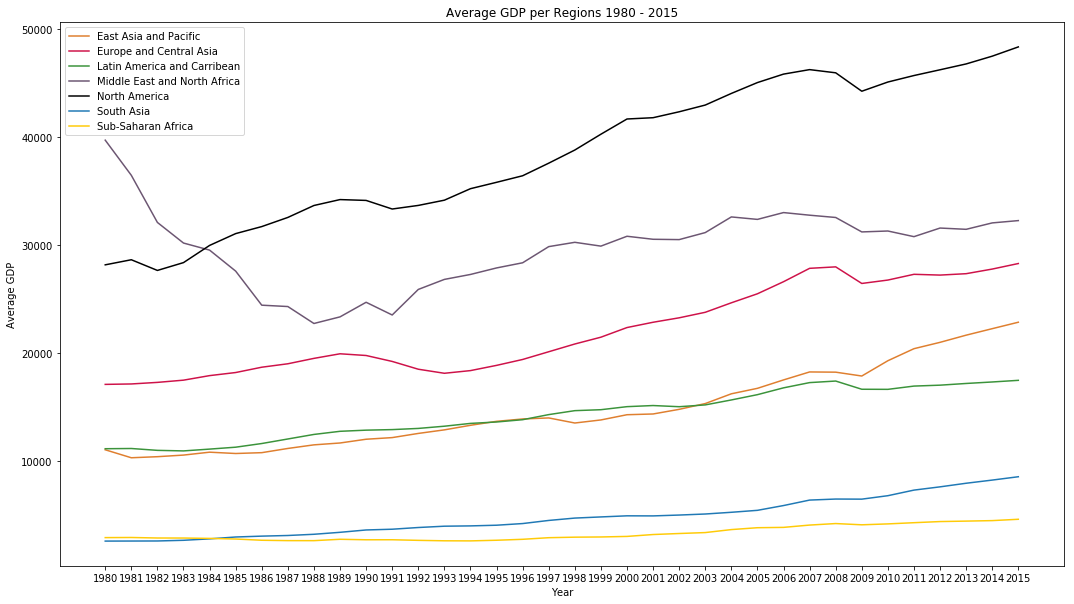

In [53]:
gdp_per_capita = parse_information(data.gdp_path, data.gdp_range, data.gdp_country_column, regions)
gdp_per_capita_regional = create_region_map_for_data(gdp_per_capita, data.gdp_country_column, regions)

eap_gdp_mean = gdp_per_capita_regional[regions.eap_short].mean()
eca_gdp_mean = gdp_per_capita_regional[regions.eca_short].mean()
lac_gdp_mean = gdp_per_capita_regional[regions.lac_short].mean()
mena_gdp_mean = gdp_per_capita_regional[regions.mena_short].mean()
noa_gdp_mean = gdp_per_capita_regional[regions.noa_short].mean()
sa_gdp_mean = gdp_per_capita_regional[regions.sa_short].mean()
ssa_gdp_mean = gdp_per_capita_regional[regions.ssa_short].mean()

figure = plt.figure(figsize=(18,10))
plt.title("Average GDP per Regions 1980 - 2015")
plt.plot(eap_gdp_mean, color=regions.eap_color, label = regions.eap_long)
plt.plot(eca_gdp_mean, color=regions.eca_color, label = regions.eca_long)
plt.plot(lac_gdp_mean, color=regions.lac_color, label = regions.lac_long)
plt.plot(mena_gdp_mean, color=regions.mena_color, label = regions.mena_long)
plt.plot(noa_gdp_mean, color=regions.noa_color, label = regions.noa_long)
plt.plot(sa_gdp_mean, color=regions.sa_color, label = regions.sa_long)
plt.plot(ssa_gdp_mean, color=regions.ssa_color, label = regions.ssa_long)
plt.legend()
plt.xlabel("Year")
plt.ylabel("Average GDP")
plt.show()

As expected, North America - USA and Canada, has the highest rates of GDP, and, unlike Europe, there are no poor countries to bring the average GDP per capita down. Also South Asia and Sub-Saharan Africa are the poorest regions. On the second place is Middle East and North Africa region, for my surprice. Lets explore a little bit deeper the distribution of GDP:

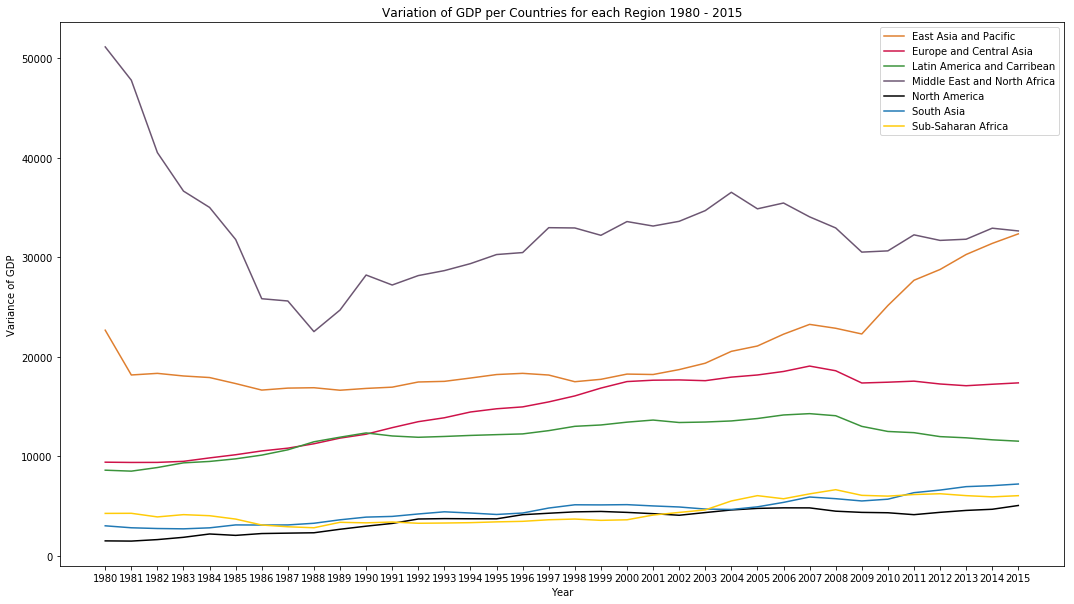

In [54]:
#Mean GDP by regions
eap_gdp_var = np.std(gdp_per_capita_regional[regions.eap_short])
eca_gdp_var = np.std(gdp_per_capita_regional[regions.eca_short])
lac_gdp_var = np.std(gdp_per_capita_regional[regions.lac_short])
mena_gdp_var = np.std(gdp_per_capita_regional[regions.mena_short])
noa_gdp_var = np.std(gdp_per_capita_regional[regions.noa_short])
sa_gdp_var = np.std(gdp_per_capita_regional[regions.sa_short])
ssa_gdp_var = np.std(gdp_per_capita_regional[regions.ssa_short])

figure = plt.figure(figsize=(18,10))
plt.title("Variation of GDP per Countries for each Region 1980 - 2015")
plt.plot(eap_gdp_var, color=regions.eap_color, label = regions.eap_long)
plt.plot(eca_gdp_var, color=regions.eca_color, label = regions.eca_long)
plt.plot(lac_gdp_var, color=regions.lac_color, label = regions.lac_long)
plt.plot(mena_gdp_var, color=regions.mena_color, label = regions.mena_long)
plt.plot(noa_gdp_var, color=regions.noa_color, label = regions.noa_long)
plt.plot(sa_gdp_var, color=regions.sa_color, label = regions.sa_long)
plt.plot(ssa_gdp_var, color=regions.ssa_color, label = regions.ssa_long)
plt.legend()
plt.xlabel("Year")
plt.ylabel("Variance of GDP")
plt.show()

The upper chart represents the deviation from the average rate of GDP for each country per region. Lets start from the bottom of the chard. For the last 35 years, north american countries are equaly rich, and countries in South Asia ana Sub-Saharan Africa are equaly poor. The other 4 regions need a little more exploration. We will extract top and bottom examples for each region for the year 2015 and try to explain the differences per region:

In [55]:
eap_top, eap_bot = extract_regional_gdp_extremes(gdp_per_capita_regional[regions.eap_short], data.gdp_country_column, '2015')
eca_top, eca_bot = extract_regional_gdp_extremes(gdp_per_capita_regional[regions.eca_short], data.gdp_country_column, '2015')
lac_top, lac_bot = extract_regional_gdp_extremes(gdp_per_capita_regional[regions.lac_short], data.gdp_country_column, '2015')
mena_top, mena_bot = extract_regional_gdp_extremes(gdp_per_capita_regional[regions.mena_short], data.gdp_country_column, '2015')

print_extremes(eap_top, eap_bot, regions.eap_long)
print_extremes(eca_top, eca_bot, regions.eca_long)
print_extremes(lac_top, lac_bot, regions.lac_long)
print_extremes(mena_top, mena_bot, regions.mena_long)

Top for East Asia and Pacific        | Bottom for East Asia and Pacific    
Macao, China         -      148374.0 | Vanuatu              -        2912.0
Singapore            -       80794.0 | Papua New Guinea     -        2529.0
Brunei               -       73003.0 | Solomon Islands      -        2047.0
Hong Kong, China     -       53874.0 | Kiribati             -        1824.0
Australia            -       44056.0 | North Korea          -        1390.0


Top for Europe and Central Asia      | Bottom for Europe and Central Asia  
Luxembourg           -       88314.0 | Georgia              -        7474.0
Norway               -       64304.0 | Uzbekistan           -        5598.0
Monaco               -       63472.0 | Moldova              -        4896.0
Switzerland          -       56118.0 | Kyrgyzstan           -        3245.0
Ireland              -       47758.0 | Tajikistan           -        2582.0


Top for Latin America and Carribean  | Bottom for Latin America and Carribean
Cayman

For the region with the biggest difference - The Middle East and North Africa, the reason is that relatively small countries has a lot of oil, which leads to big gdp per capita, and the bigger countries does not have oil. The difference in Europe and Central Asia is due to communist regimes. In Latin America the difference is that small island states are off-shore zones, leading to high gdp per capita. And in East Asia there is big diversity of states with different history and there is no specific reason for the variance other than the that. Except North Korea, of course.

<h2>GDP per Capita for each of the regions for the three major sectors of economy</h2>

In [56]:
agriculture_gdp_pct = parse_information(data.agr_gdp_path, data.agr_gdp_range, data.agr_gdp_country_column, regions)
agriculture_gdp_pct = agriculture_gdp_pct.drop(agriculture_gdp_pct.columns[-1], axis=1)
agriculture_gdp_pct_regional = create_region_map_for_data(agriculture_gdp_pct, data.agr_gdp_country_column, regions)

eap_agr_gdp_mean = agriculture_gdp_pct_regional[regions.eap_short].mean()
eca_agr_gdp_mean = agriculture_gdp_pct_regional[regions.eca_short].mean()
lac_agr_gdp_mean = agriculture_gdp_pct_regional[regions.lac_short].mean()
mena_agr_gdp_mean = agriculture_gdp_pct_regional[regions.mena_short].mean()
noa_agr_gdp_mean = agriculture_gdp_pct_regional[regions.noa_short].mean()
sa_agr_gdp_mean = agriculture_gdp_pct_regional[regions.sa_short].mean()
ssa_agr_gdp_mean = agriculture_gdp_pct_regional[regions.ssa_short].mean()

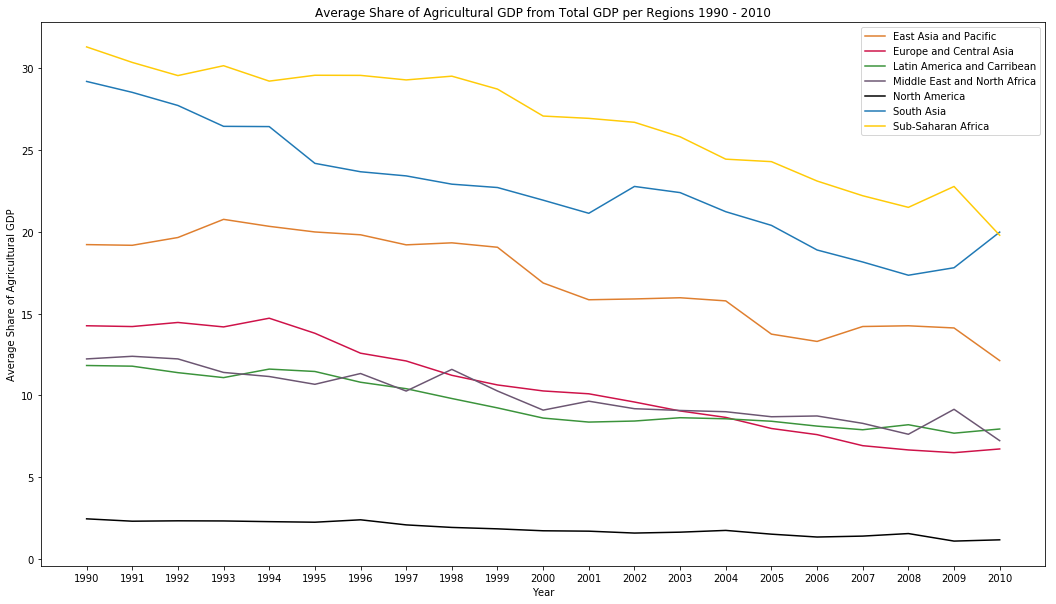

In [57]:
figure = plt.figure(figsize=(18,10))
plt.title("Average Share of Agricultural GDP from Total GDP per Regions 1990 - 2010")
plt.plot(eap_agr_gdp_mean, color=regions.eap_color, label = regions.eap_long)
plt.plot(eca_agr_gdp_mean, color=regions.eca_color, label = regions.eca_long)
plt.plot(lac_agr_gdp_mean, color=regions.lac_color, label = regions.lac_long)
plt.plot(mena_agr_gdp_mean, color=regions.mena_color, label = regions.mena_long)
plt.plot(noa_agr_gdp_mean, color=regions.noa_color, label = regions.noa_long)
plt.plot(sa_agr_gdp_mean, color=regions.sa_color, label = regions.sa_long)
plt.plot(ssa_agr_gdp_mean, color=regions.ssa_color, label = regions.ssa_long)
plt.legend()
plt.xlabel("Year")
plt.ylabel("Average Share of Agricultural GDP")
plt.show()

In [58]:
industry_gdp_pct = parse_information(data.ind_gdp_path, data.ind_gdp_range, data.ind_gdp_country_column, regions)
industry_gdp_pct = industry_gdp_pct.drop(industry_gdp_pct.columns[-1], axis=1)
industry_gdp_pct_regional = create_region_map_for_data(industry_gdp_pct, data.ind_gdp_country_column, regions)

eap_ind_gdp_mean = industry_gdp_pct_regional[regions.eap_short].mean()
eca_ind_gdp_mean = industry_gdp_pct_regional[regions.eca_short].mean()
lac_ind_gdp_mean = industry_gdp_pct_regional[regions.lac_short].mean()
mena_ind_gdp_mean = industry_gdp_pct_regional[regions.mena_short].mean()
noa_ind_gdp_mean = industry_gdp_pct_regional[regions.noa_short].mean()
sa_ind_gdp_mean = industry_gdp_pct_regional[regions.sa_short].mean()
ssa_ind_gdp_mean = industry_gdp_pct_regional[regions.ssa_short].mean()

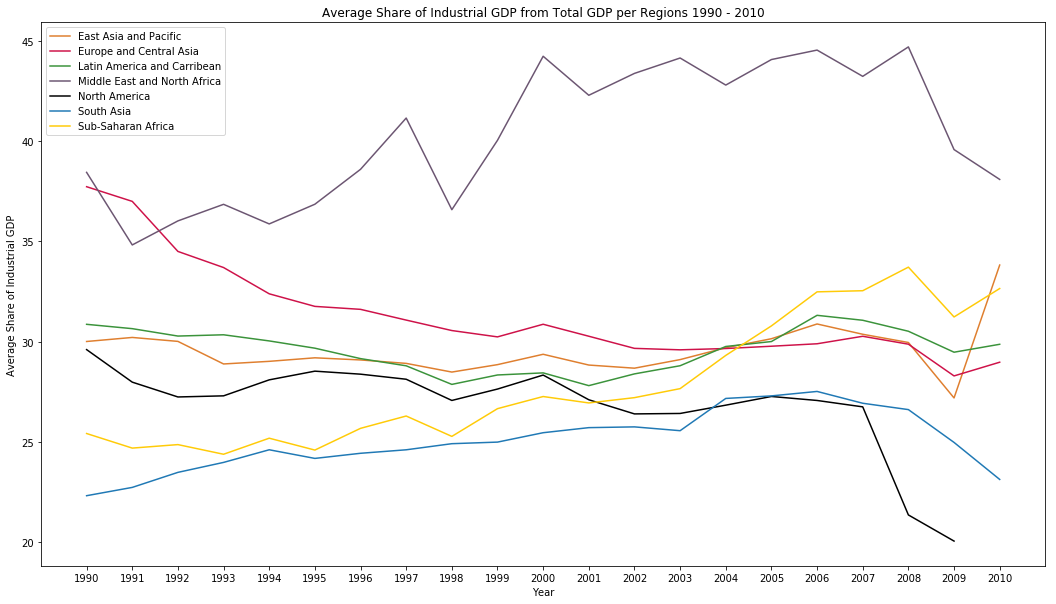

In [59]:
figure = plt.figure(figsize=(18,10))
plt.title("Average Share of Industrial GDP from Total GDP per Regions 1990 - 2010")
plt.plot(eap_ind_gdp_mean, color=regions.eap_color, label = regions.eap_long)
plt.plot(eca_ind_gdp_mean, color=regions.eca_color, label = regions.eca_long)
plt.plot(lac_ind_gdp_mean, color=regions.lac_color, label = regions.lac_long)
plt.plot(mena_ind_gdp_mean, color=regions.mena_color, label = regions.mena_long)
plt.plot(noa_ind_gdp_mean, color=regions.noa_color, label = regions.noa_long)
plt.plot(sa_ind_gdp_mean, color=regions.sa_color, label = regions.sa_long)
plt.plot(ssa_ind_gdp_mean, color=regions.ssa_color, label = regions.ssa_long)
plt.legend()
plt.xlabel("Year")
plt.ylabel("Average Share of Industrial GDP")
plt.show()

In [60]:
services_gdp_pct = parse_information(data.ser_gdp_path, data.ser_gdp_range, data.ser_gdp_country_column, regions)
services_gdp_pct = services_gdp_pct.drop(services_gdp_pct.columns[-1], axis=1)
services_gdp_pct_regional = create_region_map_for_data(services_gdp_pct, data.ser_gdp_country_column, regions)

eap_ser_gdp_mean = services_gdp_pct_regional[regions.eap_short].mean()
eca_ser_gdp_mean = services_gdp_pct_regional[regions.eca_short].mean()
lac_ser_gdp_mean = services_gdp_pct_regional[regions.lac_short].mean()
mena_ser_gdp_mean = services_gdp_pct_regional[regions.mena_short].mean()
noa_ser_gdp_mean = services_gdp_pct_regional[regions.noa_short].mean()
sa_ser_gdp_mean = services_gdp_pct_regional[regions.sa_short].mean()
ssa_ser_gdp_mean = services_gdp_pct_regional[regions.ssa_short].mean()

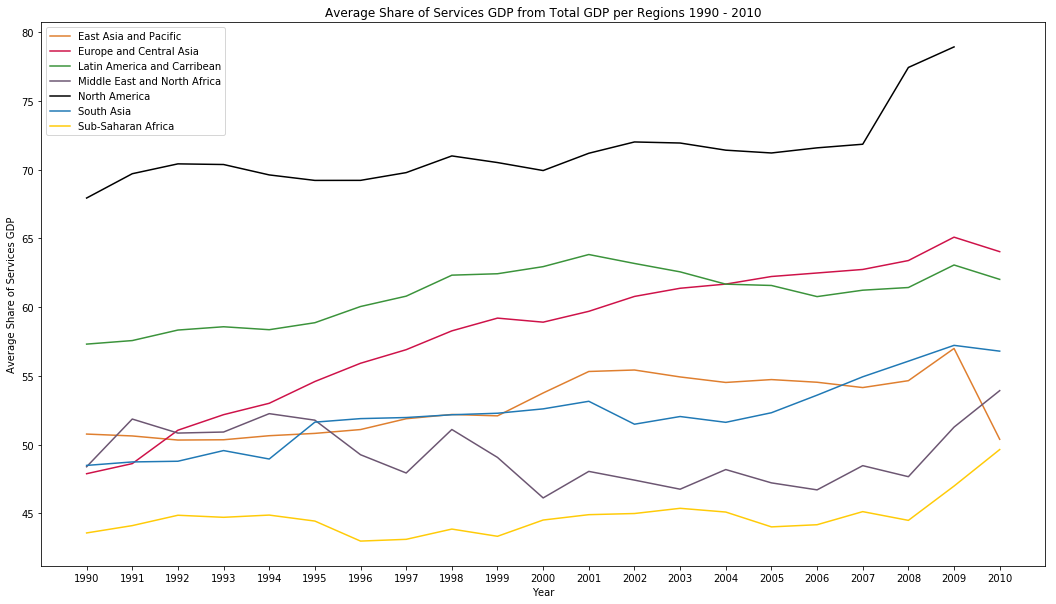

In [61]:
figure = plt.figure(figsize=(18,10))
plt.title("Average Share of Services GDP from Total GDP per Regions 1990 - 2010")
plt.plot(eap_ser_gdp_mean, color=regions.eap_color, label = regions.eap_long)
plt.plot(eca_ser_gdp_mean, color=regions.eca_color, label = regions.eca_long)
plt.plot(lac_ser_gdp_mean, color=regions.lac_color, label = regions.lac_long)
plt.plot(mena_ser_gdp_mean, color=regions.mena_color, label = regions.mena_long)
plt.plot(noa_ser_gdp_mean, color=regions.noa_color, label = regions.noa_long)
plt.plot(sa_ser_gdp_mean, color=regions.sa_color, label = regions.sa_long)
plt.plot(ssa_ser_gdp_mean, color=regions.ssa_color, label = regions.ssa_long)
plt.legend()
plt.xlabel("Year")
plt.ylabel("Average Share of Services GDP")
plt.show()

In [62]:
eap_agr_share = agriculture_gdp_pct_regional[regions.eap_short]['2009'].mean()
eap_ind_share = industry_gdp_pct_regional[regions.eap_short]['2009'].mean()
eap_ser_share = services_gdp_pct_regional[regions.eap_short]['2009'].mean()


In [63]:
eap_gdp_share = extract_gdp_by_sectors(agriculture_gdp_pct_regional[regions.eap_short], 
                                       industry_gdp_pct_regional[regions.eap_short],
                                       services_gdp_pct_regional[regions.eap_short], '2009')
eca_gdp_share = extract_gdp_by_sectors(agriculture_gdp_pct_regional[regions.eca_short], 
                                       industry_gdp_pct_regional[regions.eca_short],
                                       services_gdp_pct_regional[regions.eca_short], '2009')
lac_gdp_share = extract_gdp_by_sectors(agriculture_gdp_pct_regional[regions.lac_short], 
                                       industry_gdp_pct_regional[regions.lac_short],
                                       services_gdp_pct_regional[regions.lac_short], '2009')
mena_gdp_share = extract_gdp_by_sectors(agriculture_gdp_pct_regional[regions.mena_short], 
                                       industry_gdp_pct_regional[regions.mena_short],
                                       services_gdp_pct_regional[regions.mena_short], '2009')
noa_gdp_share = extract_gdp_by_sectors(agriculture_gdp_pct_regional[regions.noa_short], 
                                       industry_gdp_pct_regional[regions.noa_short],
                                       services_gdp_pct_regional[regions.noa_short], '2009')
sa_gdp_share = extract_gdp_by_sectors(agriculture_gdp_pct_regional[regions.sa_short], 
                                       industry_gdp_pct_regional[regions.sa_short],
                                       services_gdp_pct_regional[regions.sa_short], '2009')
ssa_gdp_share = extract_gdp_by_sectors(agriculture_gdp_pct_regional[regions.ssa_short], 
                                       industry_gdp_pct_regional[regions.ssa_short],
                                       services_gdp_pct_regional[regions.ssa_short], '2009')


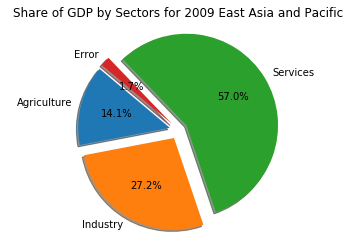

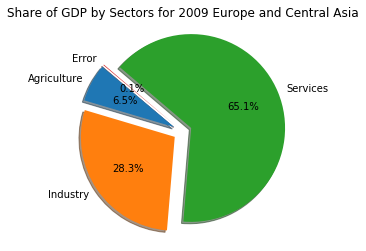

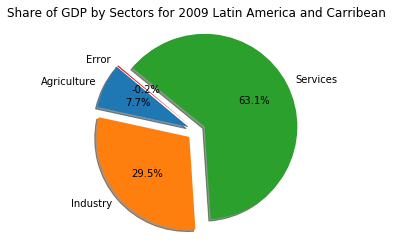

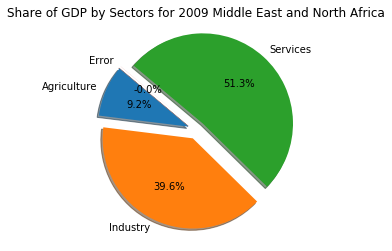

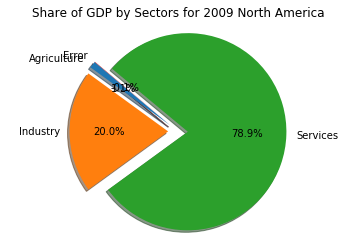

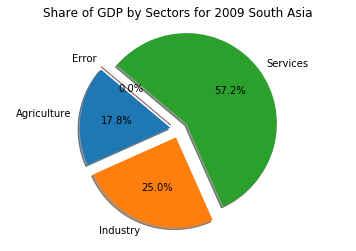

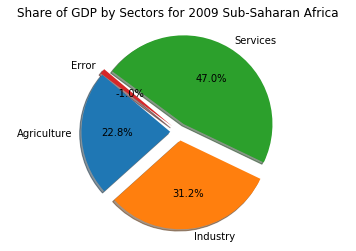

In [64]:
labels = ['Agriculture', 'Industry', 'Services', 'Error']
pies = [eap_gdp_share, eca_gdp_share, lac_gdp_share, mena_gdp_share, noa_gdp_share, sa_gdp_share, ssa_gdp_share]
pies_names = [regions.eap_long, regions.eca_long, regions.lac_long, regions.mena_long, 
              regions.noa_long, regions.sa_long, regions.ssa_long]

for i in range(0, len(pies)):
    plt.title("Share of GDP by Sectors for 2009 " + pies_names[i])
    sizes = pies[i]
    explode = (0.1, 0.1, 0.1, 0.1)  # explode 1st slice
    plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.show()


What the charts above show? 
First of all, there is steady downtrend in the share of Agricultural GDP. This does not mean thah people somehow started to eat less, it means that they consume more things other than food, even in the poorest regions. The other obvious trend is that the richer the region, the higher is the share of Servicis in GDP, reaching 80% in North America. 

<h1>2. Energy consumption and environmental issues</h1>
<br />
Lets look at electricity and coal consumption. Sub-Saharan Africa is excluded from coal consumption, because there is no data, except for Republic of South Africa.

In [65]:
coal_consumption = parse_information(data.coal_path, data.coal_range, data.coal_country_column, regions)
coal_consumption = coal_consumption.drop(coal_consumption.columns[-1], axis=1)
coal_consumption_regional = create_region_map_for_data(coal_consumption, data.coal_country_column, regions)

eap_coal_consumption_mean = coal_consumption_regional[regions.eap_short].mean()
eca_coal_consumption_mean = coal_consumption_regional[regions.eca_short].mean()
lac_coal_consumption_mean = coal_consumption_regional[regions.lac_short].mean()
mena_coal_consumption_mean = coal_consumption_regional[regions.mena_short].mean()
noa_coal_consumption_mean = coal_consumption_regional[regions.noa_short].mean()
sa_coal_consumption_mean = coal_consumption_regional[regions.sa_short].mean()
ssa_coal_consumption_mean = coal_consumption_regional[regions.ssa_short].mean()

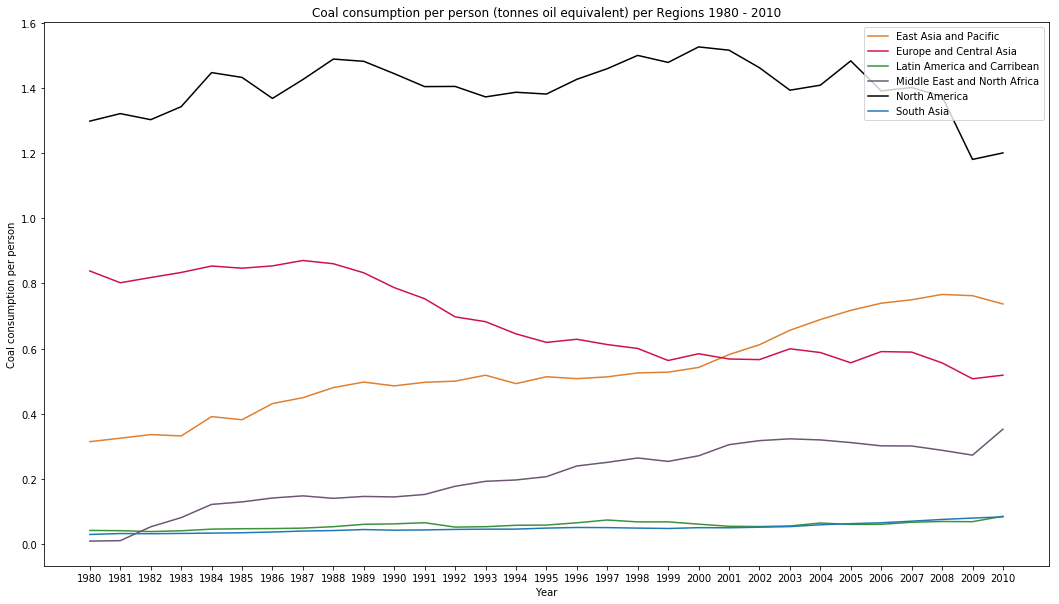

In [66]:
figure = plt.figure(figsize=(18,10))
plt.title("Coal consumption per person (tonnes oil equivalent) per Regions 1980 - 2010")
plt.plot(eap_coal_consumption_mean, color=regions.eap_color, label = regions.eap_long)
plt.plot(eca_coal_consumption_mean, color=regions.eca_color, label = regions.eca_long)
plt.plot(lac_coal_consumption_mean, color=regions.lac_color, label = regions.lac_long)
plt.plot(mena_coal_consumption_mean, color=regions.mena_color, label = regions.mena_long)
plt.plot(noa_coal_consumption_mean, color=regions.noa_color, label = regions.noa_long)
plt.plot(sa_coal_consumption_mean, color=regions.sa_color, label = regions.sa_long)
#plt.plot(ssa_coal_consumption_mean, color=regions.ssa_color, label = regions.ssa_long)
plt.legend()
plt.xlabel("Year")
plt.ylabel("Coal consumption per person")
plt.show()

In [67]:
electricity_consumption = parse_information(data.electricity_path, data.electricity_range, data.electricity_country_column, regions)
electricity_consumption = electricity_consumption.drop(electricity_consumption.columns[-1], axis=1)
electricity_consumption_regional = create_region_map_for_data(electricity_consumption, data.electricity_country_column, regions)

eap_electricity_consumption_mean = electricity_consumption_regional[regions.eap_short].mean()
eca_electricity_consumption_mean = electricity_consumption_regional[regions.eca_short].mean()
lac_electricity_consumption_mean = electricity_consumption_regional[regions.lac_short].mean()
mena_electricity_consumption_mean = electricity_consumption_regional[regions.mena_short].mean()
noa_electricity_consumption_mean = electricity_consumption_regional[regions.noa_short].mean()
sa_electricity_consumption_mean = electricity_consumption_regional[regions.sa_short].mean()
ssa_electricity_consumption_mean = electricity_consumption_regional[regions.ssa_short].mean()

#print(electricity_consumption_regional[regions.eap_short])
#print(electricity_consumption_regional[regions.eca_short])
#print(electricity_consumption_regional[regions.lac_short])
#print(electricity_consumption_regional[regions.mena_short])
#print(electricity_consumption_regional[regions.noa_short])
#print(electricity_consumption_regional[regions.sa_short])
#print(electricity_consumption_regional[regions.ssa_short])

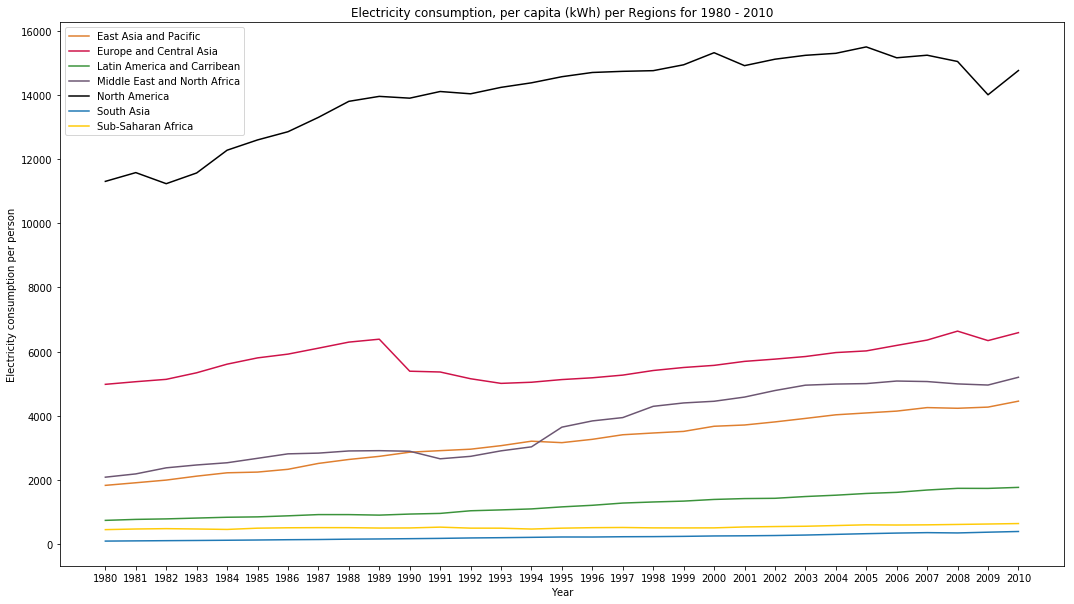

In [68]:
figure = plt.figure(figsize=(18,10))
plt.title("Electricity consumption, per capita (kWh) per Regions for 1980 - 2010")
plt.plot(eap_electricity_consumption_mean, color=regions.eap_color, label = regions.eap_long)
plt.plot(eca_electricity_consumption_mean, color=regions.eca_color, label = regions.eca_long)
plt.plot(lac_electricity_consumption_mean, color=regions.lac_color, label = regions.lac_long)
plt.plot(mena_electricity_consumption_mean, color=regions.mena_color, label = regions.mena_long)
plt.plot(noa_electricity_consumption_mean, color=regions.noa_color, label = regions.noa_long)
plt.plot(sa_electricity_consumption_mean, color=regions.sa_color, label = regions.sa_long)
plt.plot(ssa_electricity_consumption_mean, color=regions.ssa_color, label = regions.ssa_long)
plt.legend()
plt.xlabel("Year")
plt.ylabel("Electricity consumption per person")
plt.show()

North America is the region with most consumption per capita for both coal and electricity by a big margin. East Asia and Pacific is ahead of Europe and Central Asia in the consumption of coal, partly because of China industrial consumption. South Asia and Sub-Saharan Africa are way down at the bottom beacause of underdeveloped industry and warm climate. Lets look at another interesting data, carbon emissions.

In [69]:
carbon_emissions = parse_information(data.carbon_path, data.carbon_range, data.carbon_country_column, regions)
carbon_emissions = carbon_emissions.drop(carbon_emissions.columns[-1], axis=1)
carbon_emissions = carbon_emissions.drop(carbon_emissions.columns[-1], axis=1)
carbon_emissions_regional = create_region_map_for_data(carbon_emissions, data.carbon_country_column, regions)

eap_carbon_emissions_mean = carbon_emissions_regional[regions.eap_short].mean()
eca_carbon_emissions_mean = carbon_emissions_regional[regions.eca_short].mean()
lac_carbon_emissions_mean = carbon_emissions_regional[regions.lac_short].mean()
mena_carbon_emissions_mean = carbon_emissions_regional[regions.mena_short].mean()
noa_carbon_emissions_mean = carbon_emissions_regional[regions.noa_short].mean()
sa_carbon_emissions_mean = carbon_emissions_regional[regions.sa_short].mean()
ssa_carbon_emissions_mean = carbon_emissions_regional[regions.ssa_short].mean()

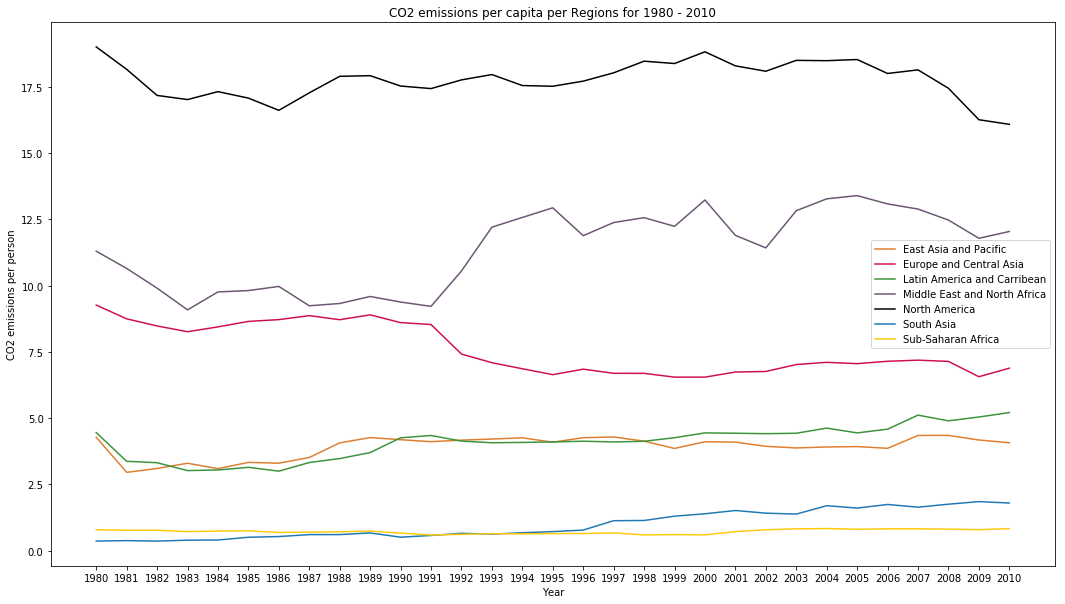

In [70]:
figure = plt.figure(figsize=(18,10))
plt.title("CO2 emissions per capita per Regions for 1980 - 2010")
plt.plot(eap_carbon_emissions_mean, color=regions.eap_color, label = regions.eap_long)
plt.plot(eca_carbon_emissions_mean, color=regions.eca_color, label = regions.eca_long)
plt.plot(lac_carbon_emissions_mean, color=regions.lac_color, label = regions.lac_long)
plt.plot(mena_carbon_emissions_mean, color=regions.mena_color, label = regions.mena_long)
plt.plot(noa_carbon_emissions_mean, color=regions.noa_color, label = regions.noa_long)
plt.plot(sa_carbon_emissions_mean, color=regions.sa_color, label = regions.sa_long)
plt.plot(ssa_carbon_emissions_mean, color=regions.ssa_color, label = regions.ssa_long)
plt.legend()
plt.xlabel("Year")
plt.ylabel("CO2 emissions per person")
plt.show()

First place for North America region is no surprice. But the powerful industrial center - East Asia, is nearly at the bottom. Lets print top states for emissions per capita:

In [71]:
sorted_carbon_emissions = carbon_emissions.sort_values(['2010'], ascending=False)
print(sorted_carbon_emissions[[data.carbon_country_column, '2010']].head(5))

           CO2 per capita       2010
132                 Qatar  40.098333
162   Trinidad and Tobago  37.777355
86                 Kuwait  34.233166
26                 Brunei  22.960326
169  United Arab Emirates  22.309405


Only small oil-rich states. This is the place to think about the 'per capita' part in the data. The large population is East Asia is clouding the data. Lets look at a more representful data - total carbon emissions, to see which countries contribute the most to carbon polution. For this we will use this report - EDGARv4.3.2, European Commission, Joint Research Centre (JRC)/PBL Netherlands Environmental Assessment Agency. Emission Database for Global Atmospheric Research (EDGAR), release version 4.3.2.

In [72]:
total_carbon_emissions = pd.read_excel(data.total_carbon_path)
total_carbon_emissions.columns = total_carbon_emissions.columns.astype(str)

In [73]:
sorted_total_carbon_emissions = total_carbon_emissions.sort_values(['2015'], ascending=False)
print(sorted_total_carbon_emissions[[data.total_carbon_country_column, '2015']].head(5))

                     Country          2015
3                      China  1.064179e+07
0   United States of America  5.172338e+06
11                     India  2.454968e+06
1         Russian Federation  1.760895e+06
4                      Japan  1.252890e+06


In [74]:
years = ['2000', '2005', '2010', '2015']
for i in range(0, 4):
    current_year = years[i]
    emissions = np.array(sorted_total_carbon_emissions[current_year])
    sum_china_usa = emissions[0] + emissions[1]
    counter = 0
    sum_n_next = 0
    for j in range (2, len(emissions)):
        sum_n_next += emissions[j]
        if(sum_n_next > sum_china_usa):
            counter = j
            break
    print("Emissions of China and USA for {}: {:,.2f}".format(current_year, sum_china_usa).replace(',', ' '))
    print("Emissions of next {} countries for {}: {:,.2f}".format(counter, current_year, sum_n_next).replace(',', ' '))
    print(' ')

Emissions of China and USA for 2000: 9 505 764.31
Emissions of next 18 countries for 2000: 9 823 710.28
 
Emissions of China and USA for 2005: 12 061 034.21
Emissions of next 24 countries for 2005: 12 169 332.79
 
Emissions of China and USA for 2010: 14 506 098.24
Emissions of next 32 countries for 2010: 14 659 871.94
 
Emissions of China and USA for 2015: 15 814 126.72
Emissions of next 34 countries for 2015: 15 828 268.30
 


For 2015 USA and China produced carbon emissions as much as the next 34 countries combined, and China produced twice as much as USA.

In [75]:
total_carbon_emissions_regional = create_region_map_for_data(total_carbon_emissions, data.total_carbon_country_column, regions)

eap_total_carbon_emissions_mean = total_carbon_emissions_regional[regions.eap_short].mean()
eca_total_carbon_emissions_mean = total_carbon_emissions_regional[regions.eca_short].mean()
lac_total_carbon_emissions_mean = total_carbon_emissions_regional[regions.lac_short].mean()
mena_total_carbon_emissions_mean = total_carbon_emissions_regional[regions.mena_short].mean()
noa_total_carbon_emissions_mean = total_carbon_emissions_regional[regions.noa_short].mean()
sa_total_carbon_emissions_mean = total_carbon_emissions_regional[regions.sa_short].mean()
ssa_total_carbon_emissions_mean = total_carbon_emissions_regional[regions.ssa_short].mean()

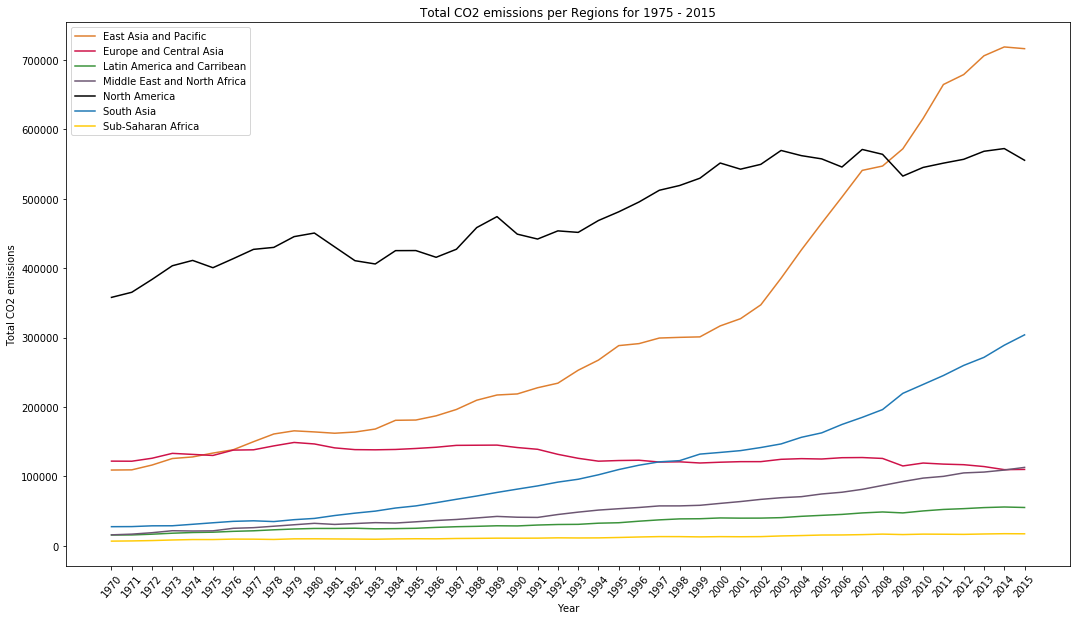

In [76]:
figure = plt.figure(figsize=(18,10))
plt.title("Total CO2 emissions per Regions for 1975 - 2015")
plt.plot(eap_total_carbon_emissions_mean, color=regions.eap_color, label = regions.eap_long)
plt.plot(eca_total_carbon_emissions_mean, color=regions.eca_color, label = regions.eca_long)
plt.plot(lac_total_carbon_emissions_mean, color=regions.lac_color, label = regions.lac_long)
plt.plot(mena_total_carbon_emissions_mean, color=regions.mena_color, label = regions.mena_long)
plt.plot(noa_total_carbon_emissions_mean, color=regions.noa_color, label = regions.noa_long)
plt.plot(sa_total_carbon_emissions_mean, color=regions.sa_color, label = regions.sa_long)
plt.plot(ssa_total_carbon_emissions_mean, color=regions.ssa_color, label = regions.ssa_long)
plt.legend()
plt.xlabel("Year")
plt.xticks(rotation=50)
plt.ylabel("Total CO2 emissions")
plt.show()

The total emissions in East Asia and Pacific surpased North American by the year 2008, and are going ahead fast. Also in South Asia total emissions have been increasing fast every year. The only little possitive trend is in Europe.

<h1>3. Health expenditures</h1>
<br />
Lets look at the health expenditures as a percent of GDP pct, by regions:

In [77]:
health_expenditures = parse_information(data.health_path, data.health_range, data.health_country_column, regions)
health_expenditures_regional = create_region_map_for_data(health_expenditures, data.health_country_column, regions)

eap_health_expenditures_mean = health_expenditures_regional[regions.eap_short].mean()
eca_health_expenditures_mean = health_expenditures_regional[regions.eca_short].mean()
lac_health_expenditures_mean = health_expenditures_regional[regions.lac_short].mean()
mena_health_expenditures_mean = health_expenditures_regional[regions.mena_short].mean()
noa_health_expenditures_mean = health_expenditures_regional[regions.noa_short].mean()
sa_health_expenditures_mean = health_expenditures_regional[regions.sa_short].mean()
ssa_health_expenditures_mean = health_expenditures_regional[regions.ssa_short].mean()

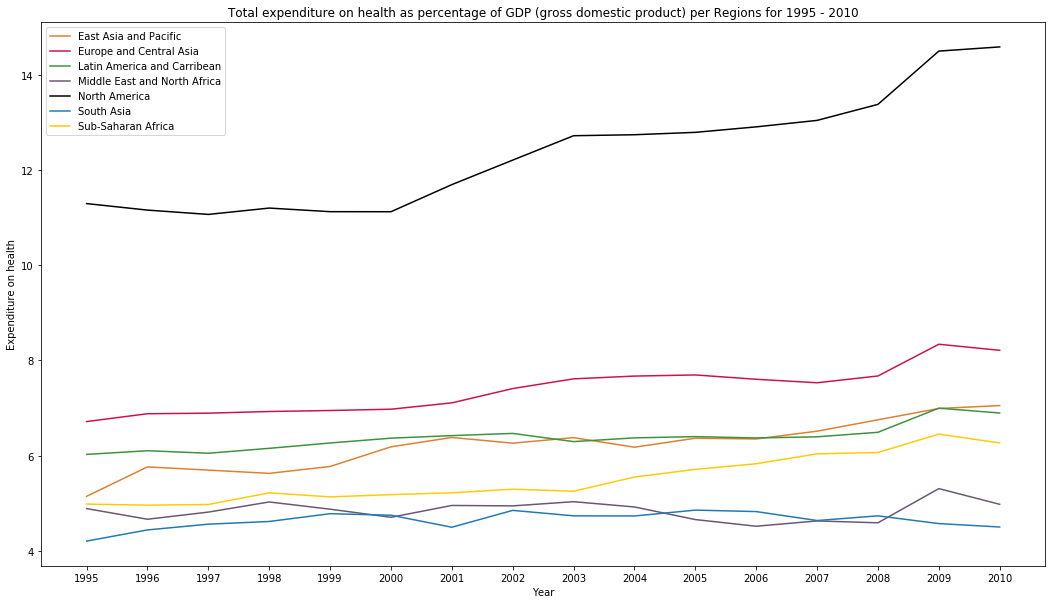

In [78]:
figure = plt.figure(figsize=(18,10))
plt.title("Total expenditure on health as percentage of GDP (gross domestic product) per Regions for 1995 - 2010")
plt.plot(eap_health_expenditures_mean, color=regions.eap_color, label = regions.eap_long)
plt.plot(eca_health_expenditures_mean, color=regions.eca_color, label = regions.eca_long)
plt.plot(lac_health_expenditures_mean, color=regions.lac_color, label = regions.lac_long)
plt.plot(mena_health_expenditures_mean, color=regions.mena_color, label = regions.mena_long)
plt.plot(noa_health_expenditures_mean, color=regions.noa_color, label = regions.noa_long)
plt.plot(sa_health_expenditures_mean, color=regions.sa_color, label = regions.sa_long)
plt.plot(ssa_health_expenditures_mean, color=regions.ssa_color, label = regions.ssa_long)
plt.legend()
plt.xlabel("Year")
plt.ylabel("Expenditure on health")
plt.show()

There is no particular high growth in the GDP expenditures as a percent, but remeber that the percent of services, including health services, in GDP is steadily increasing everywhere in the world. That means that more money are spend on health as a total.
<br/>
<br/>
The highest expenditures are in North America, due to the fact that health system in United States is the only private health system in the world. Private health system is very interesting case. On one hand, it is cheaper to go to Canada, live there for 6 months and have surgery there, but on the other hand private health system leads to the fact that USA is by far on top of health innovation, biotechnologies and quality of medical services.

Lets plot another two chars - child mortality rate and life expectancy:

In [79]:
child_mortality = parse_information(data.under_five_path, data.under_five_range, data.under_five_country_column, regions)
child_mortality = child_mortality.drop(child_mortality.columns[-1], axis=1)
child_mortality_regional = create_region_map_for_data(child_mortality, data.under_five_country_column, regions)

eap_child_mortality_mean = child_mortality_regional[regions.eap_short].mean()
eca_child_mortality_mean = child_mortality_regional[regions.eca_short].mean()
lac_child_mortality_mean = child_mortality_regional[regions.lac_short].mean()
mena_child_mortality_mean = child_mortality_regional[regions.mena_short].mean()
noa_child_mortality_mean = child_mortality_regional[regions.noa_short].mean()
sa_child_mortality_mean = child_mortality_regional[regions.sa_short].mean()
ssa_child_mortality_mean = child_mortality_regional[regions.ssa_short].mean()

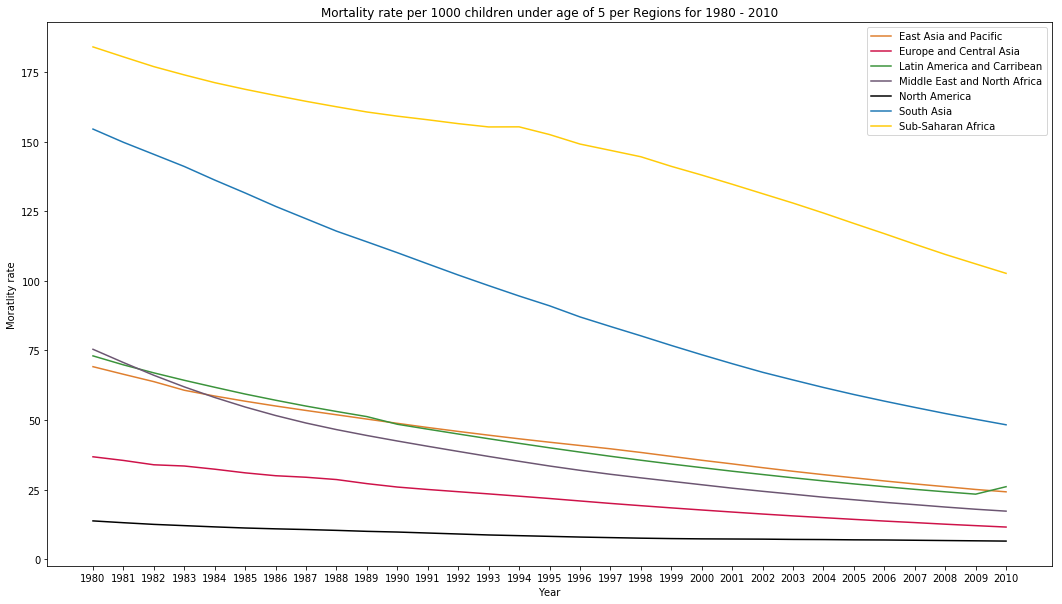

In [80]:
figure = plt.figure(figsize=(18,10))
plt.title("Mortality rate per 1000 children under age of 5 per Regions for 1980 - 2010")
plt.plot(eap_child_mortality_mean, color=regions.eap_color, label = regions.eap_long)
plt.plot(eca_child_mortality_mean, color=regions.eca_color, label = regions.eca_long)
plt.plot(lac_child_mortality_mean, color=regions.lac_color, label = regions.lac_long)
plt.plot(mena_child_mortality_mean, color=regions.mena_color, label = regions.mena_long)
plt.plot(noa_child_mortality_mean, color=regions.noa_color, label = regions.noa_long)
plt.plot(sa_child_mortality_mean, color=regions.sa_color, label = regions.sa_long)
plt.plot(ssa_child_mortality_mean, color=regions.ssa_color, label = regions.ssa_long)
plt.legend()
plt.xlabel("Year")
plt.ylabel("Moratlity rate")
plt.show()

In [81]:
life_expectancy = parse_information(data.life_exp_path, data.life_exp_range, data.life_exp_country_column, regions)
life_expectancy_regional = create_region_map_for_data(life_expectancy, data.life_exp_country_column, regions)

eap_life_expectancy_mean = life_expectancy_regional[regions.eap_short].mean()
eca_life_expectancy_mean = life_expectancy_regional[regions.eca_short].mean()
lac_life_expectancy_mean = life_expectancy_regional[regions.lac_short].mean()
mena_life_expectancy_mean = life_expectancy_regional[regions.mena_short].mean()
noa_life_expectancy_mean = life_expectancy_regional[regions.noa_short].mean()
sa_life_expectancy_mean = life_expectancy_regional[regions.sa_short].mean()
ssa_life_expectancy_mean = life_expectancy_regional[regions.ssa_short].mean()

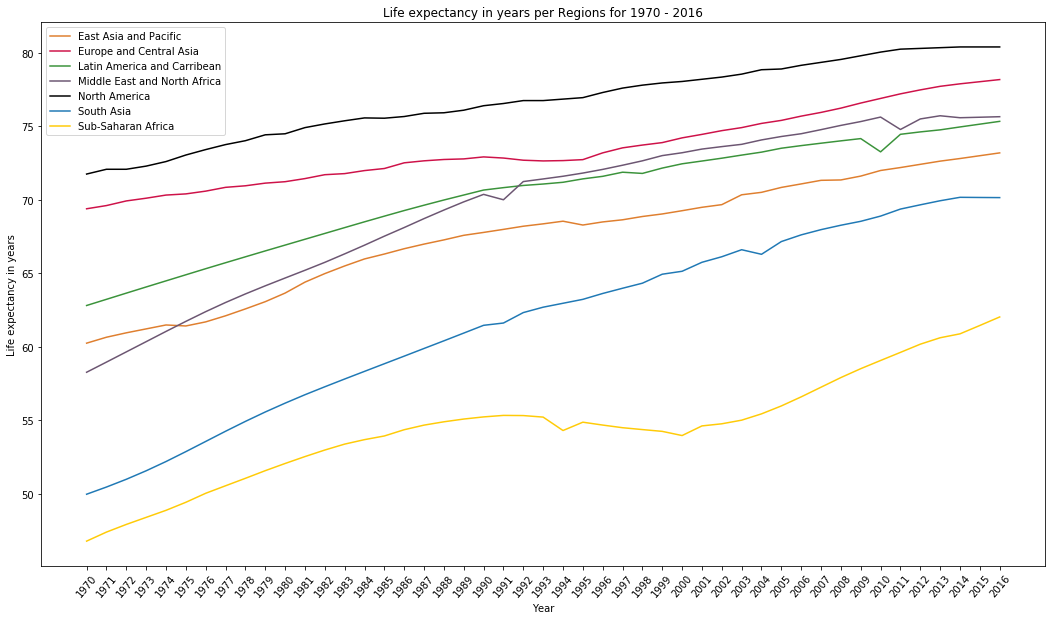

In [82]:
figure = plt.figure(figsize=(18,10))
plt.title("Life expectancy in years per Regions for 1970 - 2016")
plt.plot(eap_life_expectancy_mean, color=regions.eap_color, label = regions.eap_long)
plt.plot(eca_life_expectancy_mean, color=regions.eca_color, label = regions.eca_long)
plt.plot(lac_life_expectancy_mean, color=regions.lac_color, label = regions.lac_long)
plt.plot(mena_life_expectancy_mean, color=regions.mena_color, label = regions.mena_long)
plt.plot(noa_life_expectancy_mean, color=regions.noa_color, label = regions.noa_long)
plt.plot(sa_life_expectancy_mean, color=regions.sa_color, label = regions.sa_long)
plt.plot(ssa_life_expectancy_mean, color=regions.ssa_color, label = regions.ssa_long)
plt.legend()
plt.xlabel("Year")
plt.xticks(rotation=50)
plt.ylabel("Life expectancy in years")
plt.show()

In [83]:
urban_population = parse_information(data.urban_pop_path, data.urban_pop_range, data.urban_pop_country_column, regions)
urban_population = urban_population.drop(urban_population.columns[-1], axis=1)
urban_population_regional = create_region_map_for_data(urban_population, data.urban_pop_country_column, regions)

eap_urban_population_mean = urban_population_regional[regions.eap_short].mean()
eca_urban_population_mean = urban_population_regional[regions.eca_short].mean()
lac_urban_population_mean = urban_population_regional[regions.lac_short].mean()
mena_urban_population_mean = urban_population_regional[regions.mena_short].mean()
noa_urban_population_mean = urban_population_regional[regions.noa_short].mean()
sa_urban_population_mean = urban_population_regional[regions.sa_short].mean()
ssa_urban_population_mean = urban_population_regional[regions.ssa_short].mean()

Nothing interesting here. As the health expenditures grows with time, child mortality decreases and life expectancy increases globaly.

Lets try to find if one last relation exists - between urban population and suicide rates:

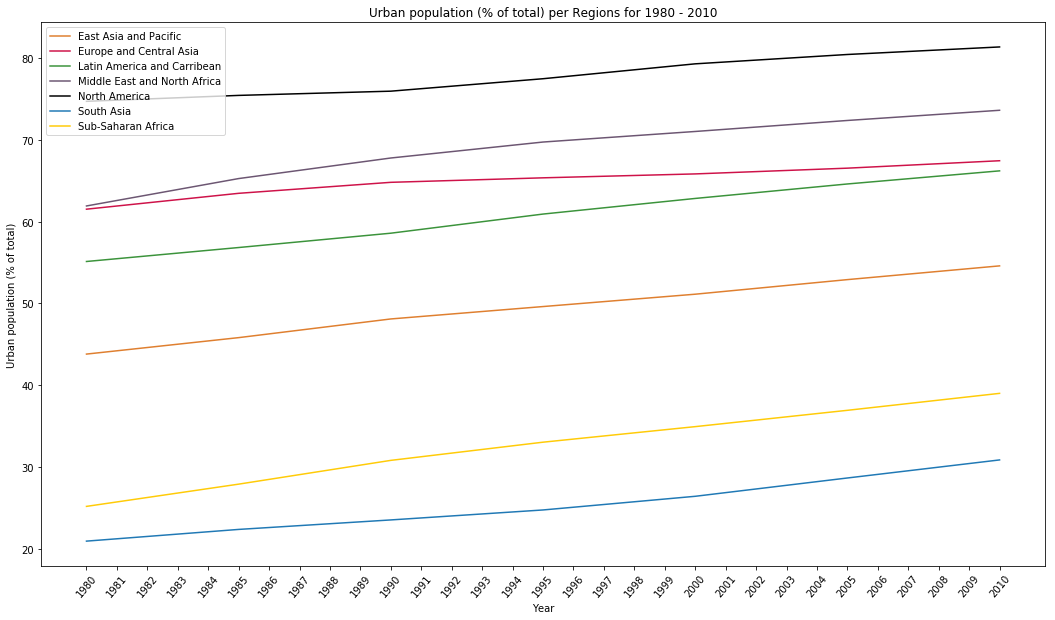

In [84]:
figure = plt.figure(figsize=(18,10))
plt.title("Urban population (% of total) per Regions for 1980 - 2010")
plt.plot(eap_urban_population_mean, color=regions.eap_color, label = regions.eap_long)
plt.plot(eca_urban_population_mean, color=regions.eca_color, label = regions.eca_long)
plt.plot(lac_urban_population_mean, color=regions.lac_color, label = regions.lac_long)
plt.plot(mena_urban_population_mean, color=regions.mena_color, label = regions.mena_long)
plt.plot(noa_urban_population_mean, color=regions.noa_color, label = regions.noa_long)
plt.plot(sa_urban_population_mean, color=regions.sa_color, label = regions.sa_long)
plt.plot(ssa_urban_population_mean, color=regions.ssa_color, label = regions.ssa_long)
plt.legend()
plt.xlabel("Year")
plt.xticks(rotation=50)
plt.ylabel("Urban population (% of total)")
plt.show()

In [85]:
suicide_rate = parse_information(data.suicide_path, data.suicide_range, data.suicide_country_column, regions)
suicide_rate_regional = create_region_map_for_data(suicide_rate, data.suicide_country_column, regions)

eap_suicide_rate_mean = suicide_rate_regional[regions.eap_short].mean()
eca_suicide_rate_mean = suicide_rate_regional[regions.eca_short].mean()
lac_suicide_rate_mean = suicide_rate_regional[regions.lac_short].mean()
mena_suicide_rate_mean = suicide_rate_regional[regions.mena_short].mean()
noa_suicide_rate_mean = suicide_rate_regional[regions.noa_short].mean()
sa_suicide_rate_mean = suicide_rate_regional[regions.sa_short].mean()
ssa_suicide_rate_mean = suicide_rate_regional[regions.ssa_short].mean()

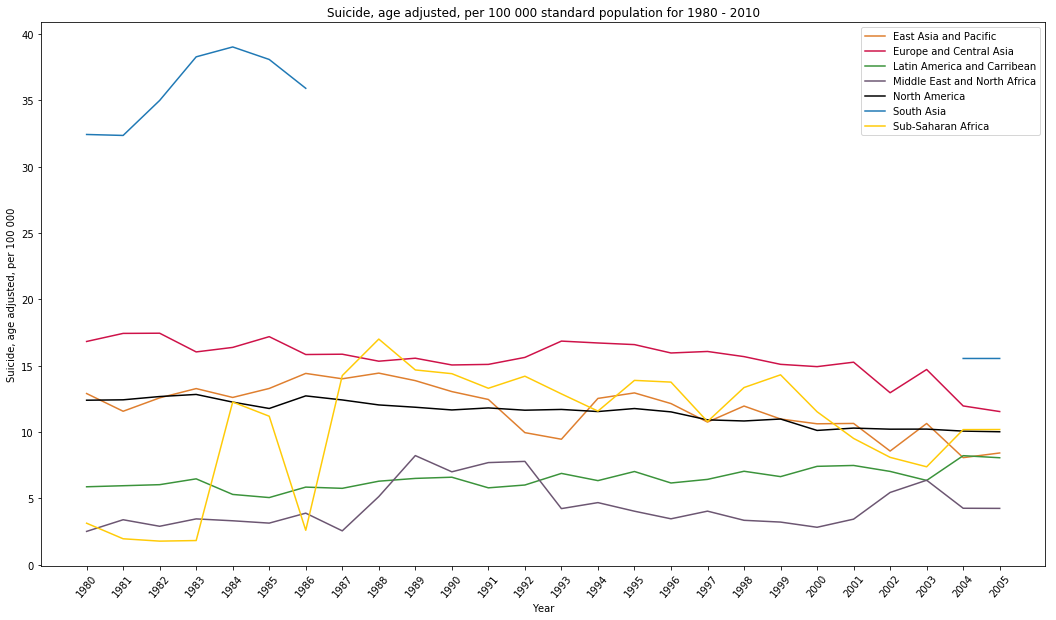

In [86]:
figure = plt.figure(figsize=(18,10))
plt.title("Suicide, age adjusted, per 100 000 standard population for 1980 - 2010")
plt.plot(eap_suicide_rate_mean, color=regions.eap_color, label = regions.eap_long)
plt.plot(eca_suicide_rate_mean, color=regions.eca_color, label = regions.eca_long)
plt.plot(lac_suicide_rate_mean, color=regions.lac_color, label = regions.lac_long)
plt.plot(mena_suicide_rate_mean, color=regions.mena_color, label = regions.mena_long)
plt.plot(noa_suicide_rate_mean, color=regions.noa_color, label = regions.noa_long)
plt.plot(sa_suicide_rate_mean, color=regions.sa_color, label = regions.sa_long)
plt.plot(ssa_suicide_rate_mean, color=regions.ssa_color, label = regions.ssa_long)
plt.legend()
plt.xlabel("Year")
plt.xticks(rotation=50)
plt.ylabel("Suicide, age adjusted, per 100 000")
plt.show()

Urban population is steadily increasing in the last years, followin the decrease of agricultural share in GDP. But there is no connection to the suicide rates whatsoever. Suicide rates trend have been flat throug the years, no relation to GDP or health expenditures.
<br />
<br />
One interesting case is South Asia - very high rates, followed by missing data, than lowered rates. This is due to the practise of the so called 'Sati' - an antient religious ritual in India, where widowed women, if not having small children, are expected to commit suicide after their husband's death. The government in India tries to hide information about this, than banned the practise, leading to the decrease in suicides in the last decade.

<h1>How do economical factors influence health across countries? <br /> Final conclusion</h1>
<br />
Life expectancy and health gets better in the last century, and child mortality decreases with every year. GDP statistics shows that with economic growth people spend less and less on food as a percent, and more ont health care. Developed countries with free markets have the best stats. There is no health in religion or mysticism of India or Africa. Theese are the poorest regions, actually. <br />
Polution increases with economic growth, but this fact does not seem to decrease life expectacy in general. For now, at least.


<h1>Part 2
<br /><br />
How do our choices in food and drinks affect our overall health?</h1>
<br />
Lets explore how food choices affects health. We will continue using the World's bank regions.

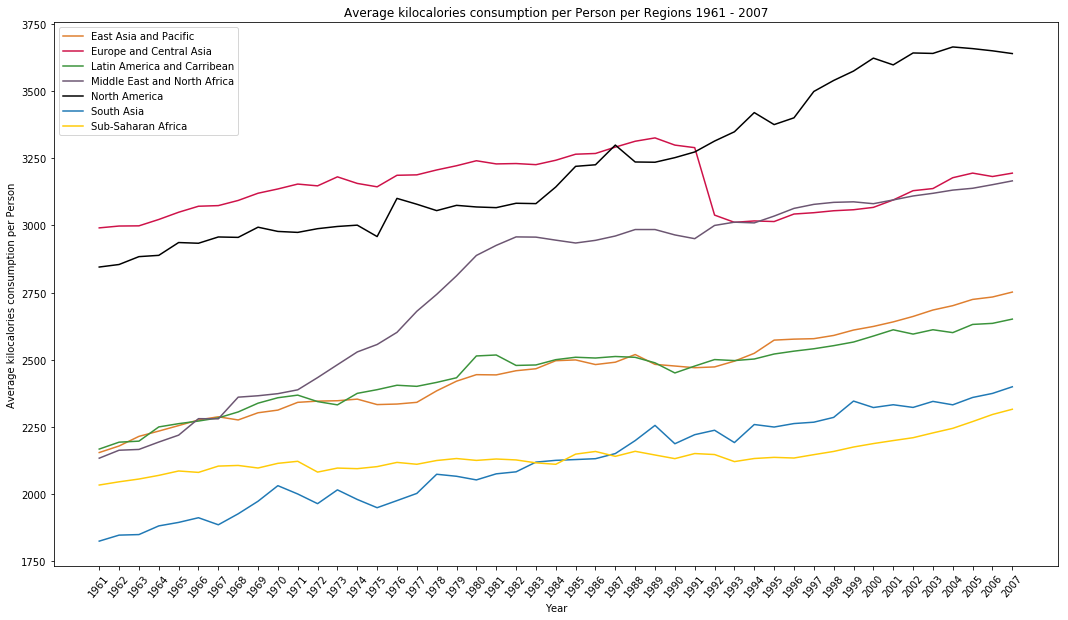

In [87]:
food_consumption = parse_information(data.food_path, data.food_range, data.food_country_column, regions)
food_consumption_regional = create_region_map_for_data(food_consumption, data.food_country_column, regions)

food_consumption_eap_mean = food_consumption_regional[regions.eap_short].mean()
food_consumption_eca_mean = food_consumption_regional[regions.eca_short].mean()
food_consumption_lac_mean = food_consumption_regional[regions.lac_short].mean()
food_consumption_mena_mean = food_consumption_regional[regions.mena_short].mean()
food_consumption_noa_mean = food_consumption_regional[regions.noa_short].mean()
food_consumption_sa_mean = food_consumption_regional[regions.sa_short].mean()
food_consumption_ssa_mean = food_consumption_regional[regions.ssa_short].mean()

figure = plt.figure(figsize=(18,10))
plt.title("Average kilocalories consumption per Person per Regions 1961 - 2007")
plt.plot(food_consumption_eap_mean, color=regions.eap_color, label = regions.eap_long)
plt.plot(food_consumption_eca_mean, color=regions.eca_color, label = regions.eca_long)
plt.plot(food_consumption_lac_mean, color=regions.lac_color, label = regions.lac_long)
plt.plot(food_consumption_mena_mean, color=regions.mena_color, label = regions.mena_long)
plt.plot(food_consumption_noa_mean, color=regions.noa_color, label = regions.noa_long)
plt.plot(food_consumption_sa_mean, color=regions.sa_color, label = regions.sa_long)
plt.plot(food_consumption_ssa_mean, color=regions.ssa_color, label = regions.ssa_long)
plt.legend()
plt.xlabel("Year")
plt.xticks(rotation=50)
plt.ylabel("Average kilocalories consumption per Person")
plt.show()

Average consumption grows consistently during the last fifty years. The only drop is in Europe and Central Asia around the year 1989. Probably it is connected to the fall of USSR and the following crisys in Eastert and Central Europe. People from regions with higher GDP eats a lot more.

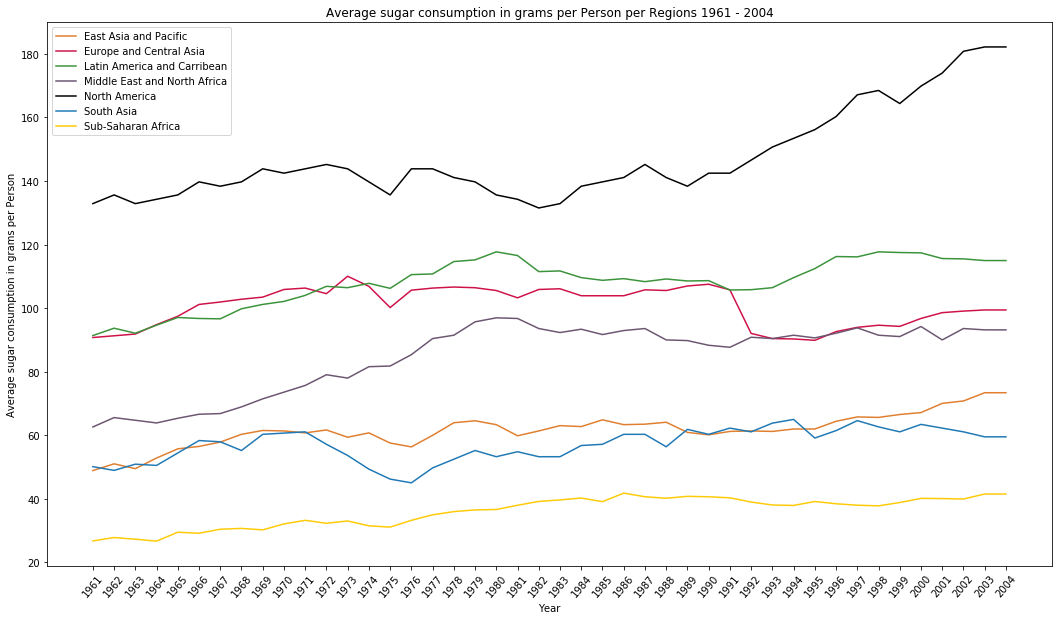

In [88]:
sugar_consumption = parse_information(data.sugar_path, data.sugar_range, data.sugar_country_column, regions)
sugar_consumption_regional = create_region_map_for_data(sugar_consumption, data.sugar_country_column, regions)

sugar_consumption_eap_mean = sugar_consumption_regional[regions.eap_short].mean()
sugar_consumption_eca_mean = sugar_consumption_regional[regions.eca_short].mean()
sugar_consumption_lac_mean = sugar_consumption_regional[regions.lac_short].mean()
sugar_consumption_mena_mean = sugar_consumption_regional[regions.mena_short].mean()
sugar_consumption_noa_mean = sugar_consumption_regional[regions.noa_short].mean()
sugar_consumption_sa_mean = sugar_consumption_regional[regions.sa_short].mean()
sugar_consumption_ssa_mean = sugar_consumption_regional[regions.ssa_short].mean()

figure = plt.figure(figsize=(18,10))
plt.title("Average sugar consumption in grams per Person per Regions 1961 - 2004")
plt.plot(sugar_consumption_eap_mean, color=regions.eap_color, label = regions.eap_long)
plt.plot(sugar_consumption_eca_mean, color=regions.eca_color, label = regions.eca_long)
plt.plot(sugar_consumption_lac_mean, color=regions.lac_color, label = regions.lac_long)
plt.plot(sugar_consumption_mena_mean, color=regions.mena_color, label = regions.mena_long)
plt.plot(sugar_consumption_noa_mean, color=regions.noa_color, label = regions.noa_long)
plt.plot(sugar_consumption_sa_mean, color=regions.sa_color, label = regions.sa_long)
plt.plot(sugar_consumption_ssa_mean, color=regions.ssa_color, label = regions.ssa_long)
plt.legend()
plt.xlabel("Year")
plt.xticks(rotation=50)
plt.ylabel("Average sugar consumption in grams per Person")
plt.show()

Sugar consumption results are close to the average kilocalories consumption graph, the only difference being that latin americans eats a lot more sugar compared to the average kilocalories, mostly beacause Latin America is the main producer of sugar in the world.

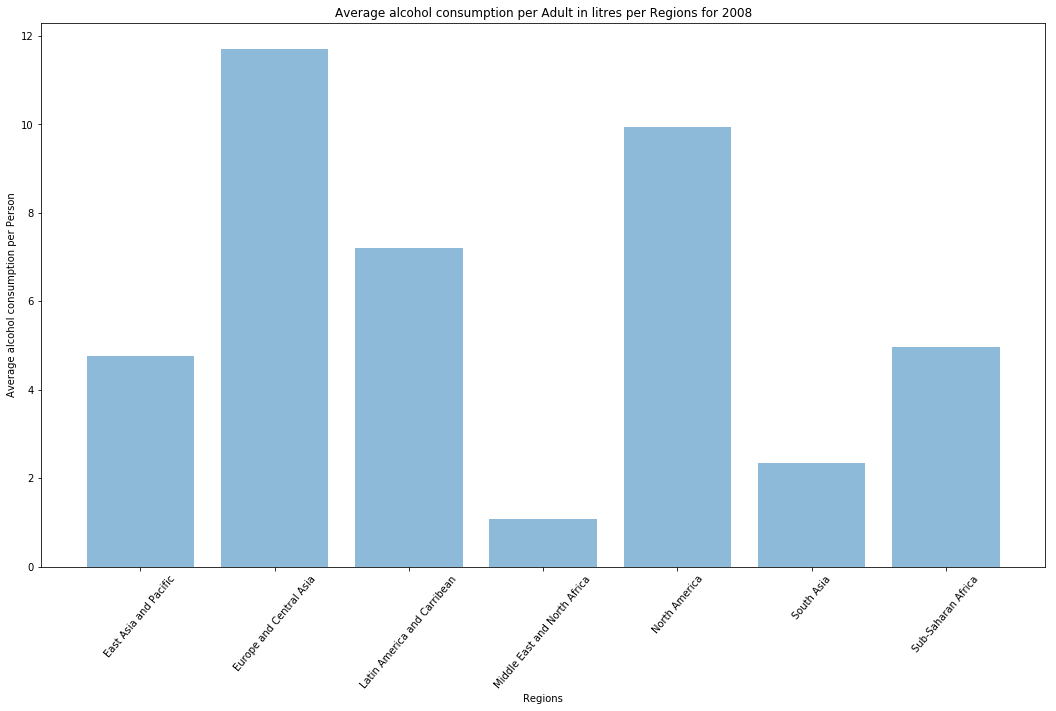

In [89]:
alc_consumption = parse_information(data.alc_path, data.alc_range, data.alc_country_column, regions)
alc_consumption_regional = create_region_map_for_data(alc_consumption, data.alc_country_column, regions)

alc_consumption_eap_mean = alc_consumption_regional[regions.eap_short].mean()
alc_consumption_eca_mean = alc_consumption_regional[regions.eca_short].mean()
alc_consumption_lac_mean = alc_consumption_regional[regions.lac_short].mean()
alc_consumption_mena_mean = alc_consumption_regional[regions.mena_short].mean()
alc_consumption_noa_mean = alc_consumption_regional[regions.noa_short].mean()
alc_consumption_sa_mean = alc_consumption_regional[regions.sa_short].mean()
alc_consumption_ssa_mean = alc_consumption_regional[regions.ssa_short].mean()

figure = plt.figure(figsize=(18,10))
plt.title("Average alcohol consumption per Adult in litres per Regions for 2008")
alc_regions = [regions.eap_long, regions.eca_long, regions.lac_long, regions.mena_long, 
           regions.noa_long, regions.sa_long, regions.ssa_long]

litres = [alc_consumption_eap_mean[0], alc_consumption_eca_mean[0], alc_consumption_lac_mean[0], alc_consumption_mena_mean[0], 
          alc_consumption_noa_mean[0], alc_consumption_sa_mean[0], alc_consumption_ssa_mean[0]]

plt.bar(alc_regions, litres, align='center', alpha=0.5)
plt.xticks(alc_regions)
plt.legend()
plt.xlabel("Regions")
plt.xticks(rotation=50)
plt.ylabel("Average alcohol consumption per Person")
plt.show()

Alcohol consumption is mostly related to traditions, and not to economic factors. People from mostly muslim regions - All the Middle East and North Africa and Afganistan and Pakistan from South Asia, drinks much less than people from other regions.

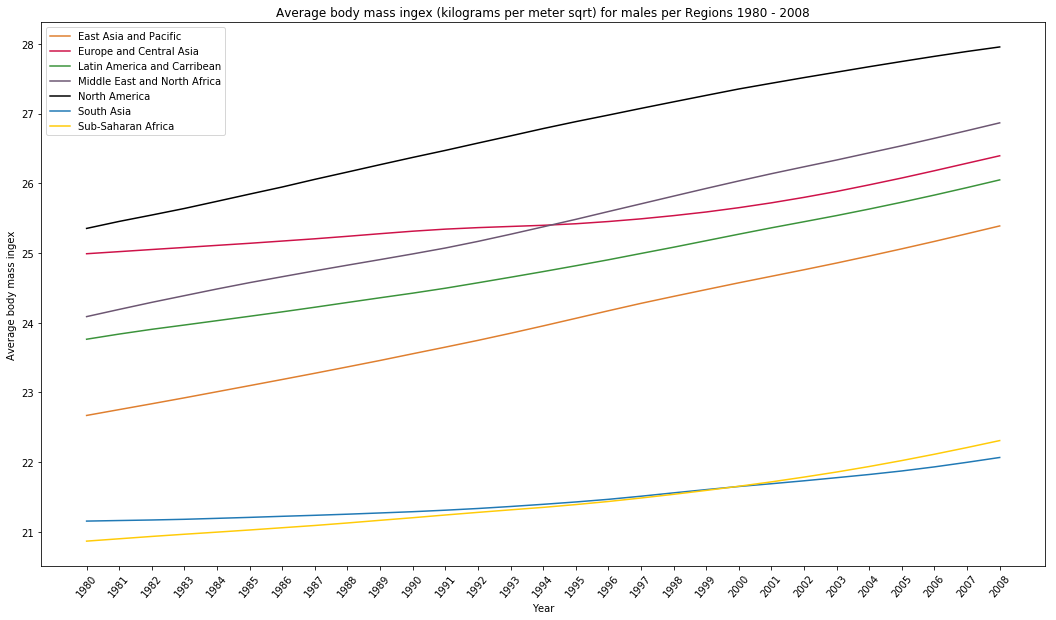

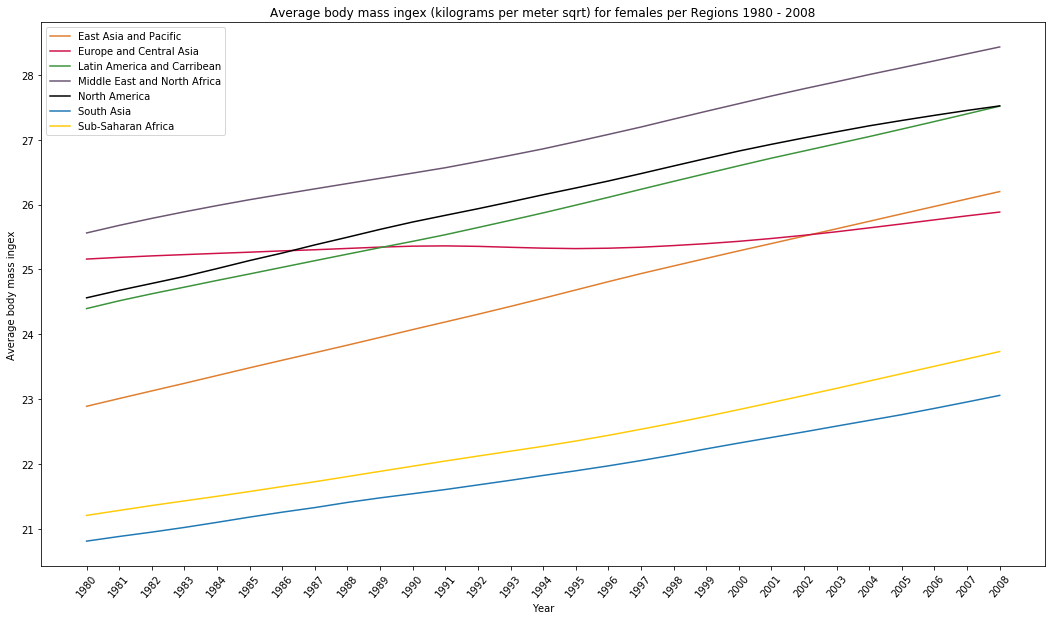

In [90]:
bmi_male = parse_information(data.bmi_male_path, data.bmi_male_range, data.bmi_male_country_column, regions)
bmi_male_regional = create_region_map_for_data(bmi_male, data.bmi_male_country_column, regions)

bmi_male_eap_mean = bmi_male_regional[regions.eap_short].mean()
bmi_male_eca_mean = bmi_male_regional[regions.eca_short].mean()
bmi_male_lac_mean = bmi_male_regional[regions.lac_short].mean()
bmi_male_mena_mean = bmi_male_regional[regions.mena_short].mean()
bmi_male_noa_mean = bmi_male_regional[regions.noa_short].mean()
bmi_male_sa_mean = bmi_male_regional[regions.sa_short].mean()
bmi_male_ssa_mean = bmi_male_regional[regions.ssa_short].mean()

figure = plt.figure(figsize=(18,10))
plt.title("Average body mass ingex (kilograms per meter sqrt) for males per Regions 1980 - 2008")
plt.plot(bmi_male_eap_mean, color=regions.eap_color, label = regions.eap_long)
plt.plot(bmi_male_eca_mean, color=regions.eca_color, label = regions.eca_long)
plt.plot(bmi_male_lac_mean, color=regions.lac_color, label = regions.lac_long)
plt.plot(bmi_male_mena_mean, color=regions.mena_color, label = regions.mena_long)
plt.plot(bmi_male_noa_mean, color=regions.noa_color, label = regions.noa_long)
plt.plot(bmi_male_sa_mean, color=regions.sa_color, label = regions.sa_long)
plt.plot(bmi_male_ssa_mean, color=regions.ssa_color, label = regions.ssa_long)
plt.legend()
plt.xlabel("Year")
plt.xticks(rotation=50)
plt.ylabel("Average body mass ingex")
plt.show()

bmi_female = parse_information(data.bmi_female_path, data.bmi_female_range, data.bmi_female_country_column, regions)
bmi_female_regional = create_region_map_for_data(bmi_female, data.bmi_male_country_column, regions)

bmi_female_eap_mean = bmi_female_regional[regions.eap_short].mean()
bmi_female_eca_mean = bmi_female_regional[regions.eca_short].mean()
bmi_female_lac_mean = bmi_female_regional[regions.lac_short].mean()
bmi_female_mena_mean = bmi_female_regional[regions.mena_short].mean()
bmi_female_noa_mean = bmi_female_regional[regions.noa_short].mean()
bmi_female_sa_mean = bmi_female_regional[regions.sa_short].mean()
bmi_female_ssa_mean = bmi_female_regional[regions.ssa_short].mean()

figure = plt.figure(figsize=(18,10))
plt.title("Average body mass ingex (kilograms per meter sqrt) for females per Regions 1980 - 2008")
plt.plot(bmi_female_eap_mean, color=regions.eap_color, label = regions.eap_long)
plt.plot(bmi_female_eca_mean, color=regions.eca_color, label = regions.eca_long)
plt.plot(bmi_female_lac_mean, color=regions.lac_color, label = regions.lac_long)
plt.plot(bmi_female_mena_mean, color=regions.mena_color, label = regions.mena_long)
plt.plot(bmi_female_noa_mean, color=regions.noa_color, label = regions.noa_long)
plt.plot(bmi_female_sa_mean, color=regions.sa_color, label = regions.sa_long)
plt.plot(bmi_female_ssa_mean, color=regions.ssa_color, label = regions.ssa_long)
plt.legend()
plt.xlabel("Year")
plt.xticks(rotation=50)
plt.ylabel("Average body mass ingex")
plt.show()

People from regions with with more average kilocalories and sugar consumption are ahead on the average body mass index. Lucky for us european women are the exception on this trend.

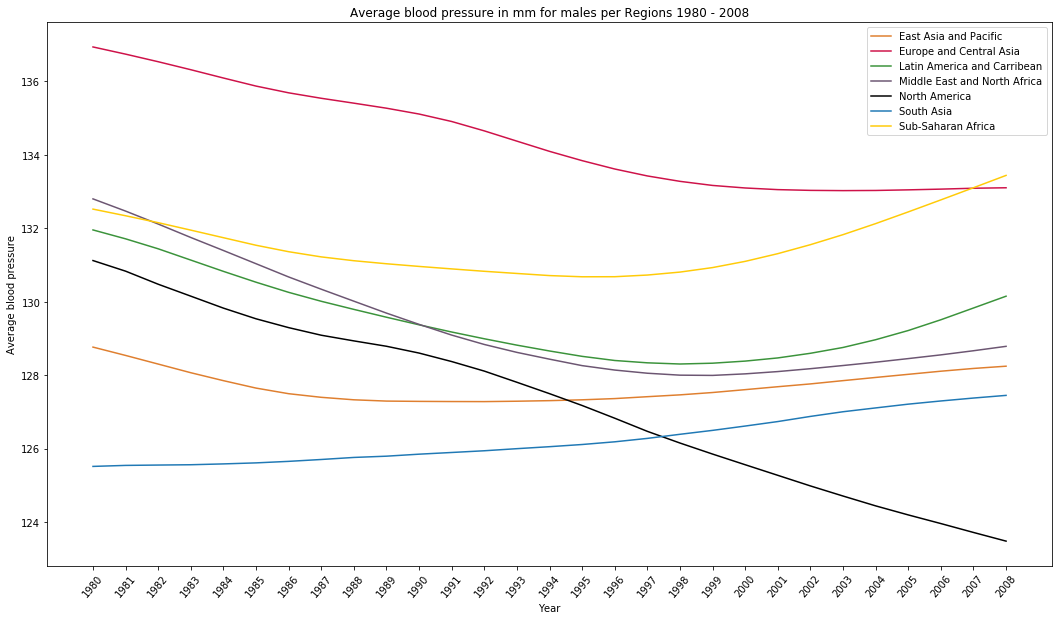

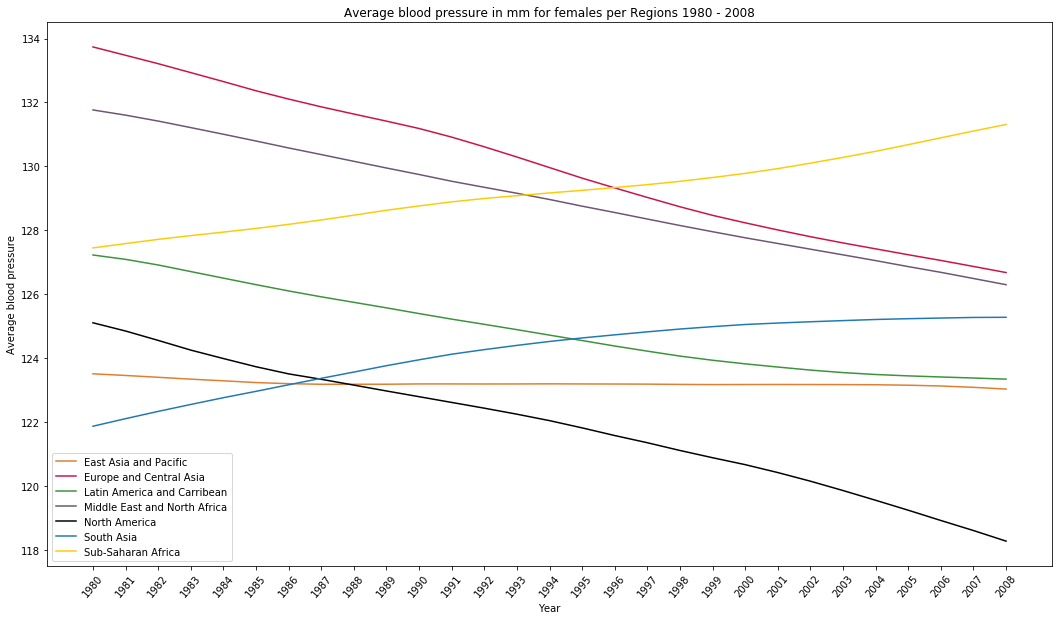

In [91]:
bp_male = parse_information(data.bp_male_path, data.bp_male_range, data.bp_male_country_column, regions)
bp_male_regional = create_region_map_for_data(bp_male, data.bp_male_country_column, regions)

bp_male_eap_mean = bp_male_regional[regions.eap_short].mean()
bp_male_eca_mean = bp_male_regional[regions.eca_short].mean()
bp_male_lac_mean = bp_male_regional[regions.lac_short].mean()
bp_male_mena_mean = bp_male_regional[regions.mena_short].mean()
bp_male_noa_mean = bp_male_regional[regions.noa_short].mean()
bp_male_sa_mean = bp_male_regional[regions.sa_short].mean()
bp_male_ssa_mean = bp_male_regional[regions.ssa_short].mean()

figure = plt.figure(figsize=(18,10))
plt.title("Average blood pressure in mm for males per Regions 1980 - 2008")
plt.plot(bp_male_eap_mean, color=regions.eap_color, label = regions.eap_long)
plt.plot(bp_male_eca_mean, color=regions.eca_color, label = regions.eca_long)
plt.plot(bp_male_lac_mean, color=regions.lac_color, label = regions.lac_long)
plt.plot(bp_male_mena_mean, color=regions.mena_color, label = regions.mena_long)
plt.plot(bp_male_noa_mean, color=regions.noa_color, label = regions.noa_long)
plt.plot(bp_male_sa_mean, color=regions.sa_color, label = regions.sa_long)
plt.plot(bp_male_ssa_mean, color=regions.ssa_color, label = regions.ssa_long)
plt.legend()
plt.xlabel("Year")
plt.xticks(rotation=50)
plt.ylabel("Average blood pressure")
plt.show()

bp_female = parse_information(data.bp_female_path, data.bp_female_range, data.bp_female_country_column, regions)
bp_female_regional = create_region_map_for_data(bp_female, data.bp_female_country_column, regions)

bp_female_eap_mean = bp_female_regional[regions.eap_short].mean()
bp_female_eca_mean = bp_female_regional[regions.eca_short].mean()
bp_female_lac_mean = bp_female_regional[regions.lac_short].mean()
bp_female_mena_mean = bp_female_regional[regions.mena_short].mean()
bp_female_noa_mean = bp_female_regional[regions.noa_short].mean()
bp_female_sa_mean = bp_female_regional[regions.sa_short].mean()
bp_female_ssa_mean = bp_female_regional[regions.ssa_short].mean()

figure = plt.figure(figsize=(18,10))
plt.title("Average blood pressure in mm for females per Regions 1980 - 2008")
plt.plot(bp_female_eap_mean, color=regions.eap_color, label = regions.eap_long)
plt.plot(bp_female_eca_mean, color=regions.eca_color, label = regions.eca_long)
plt.plot(bp_female_lac_mean, color=regions.lac_color, label = regions.lac_long)
plt.plot(bp_female_mena_mean, color=regions.mena_color, label = regions.mena_long)
plt.plot(bp_female_noa_mean, color=regions.noa_color, label = regions.noa_long)
plt.plot(bp_female_sa_mean, color=regions.sa_color, label = regions.sa_long)
plt.plot(bp_female_ssa_mean, color=regions.ssa_color, label = regions.ssa_long)
plt.legend()
plt.xlabel("Year")
plt.xticks(rotation=50)
plt.ylabel("Average blood pressure")
plt.show()

Average blood pressure shows some strange results. Sub-saharan africans have much higher blood pressure on average. The only explanation I found about that is a theory that there may be a gene that makes them much more salt sensitive. In people who have this gene, as little as one extra gram (half a teaspoon) of salt could raise blood pressure as much as 5 mm Hg. The other thing is the drop in blood pressure among North Americans. This may be explained with the usage of prescription medicines or other drugs.

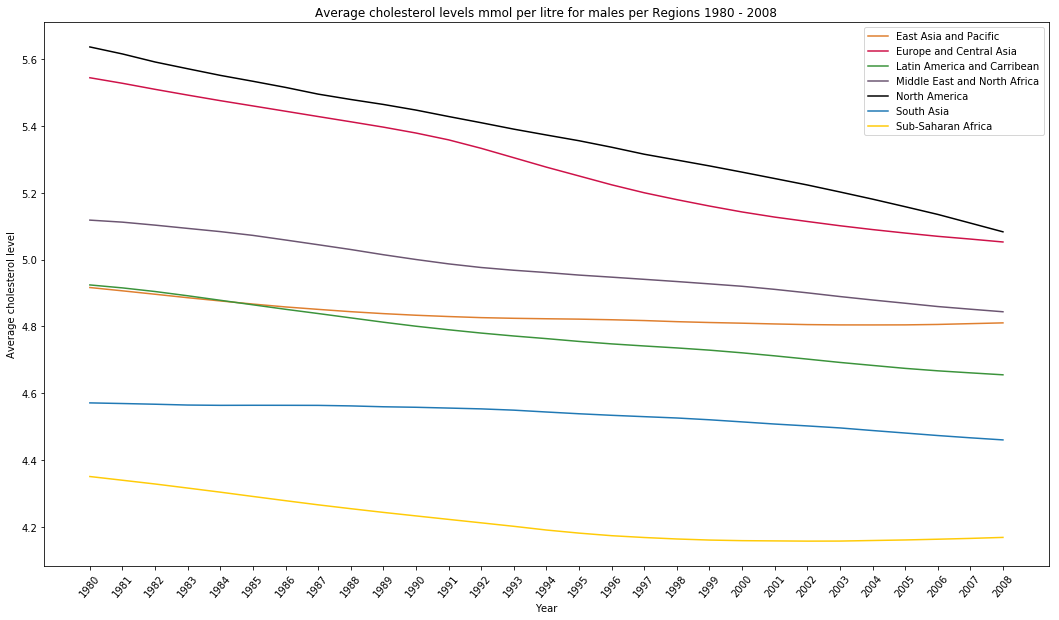

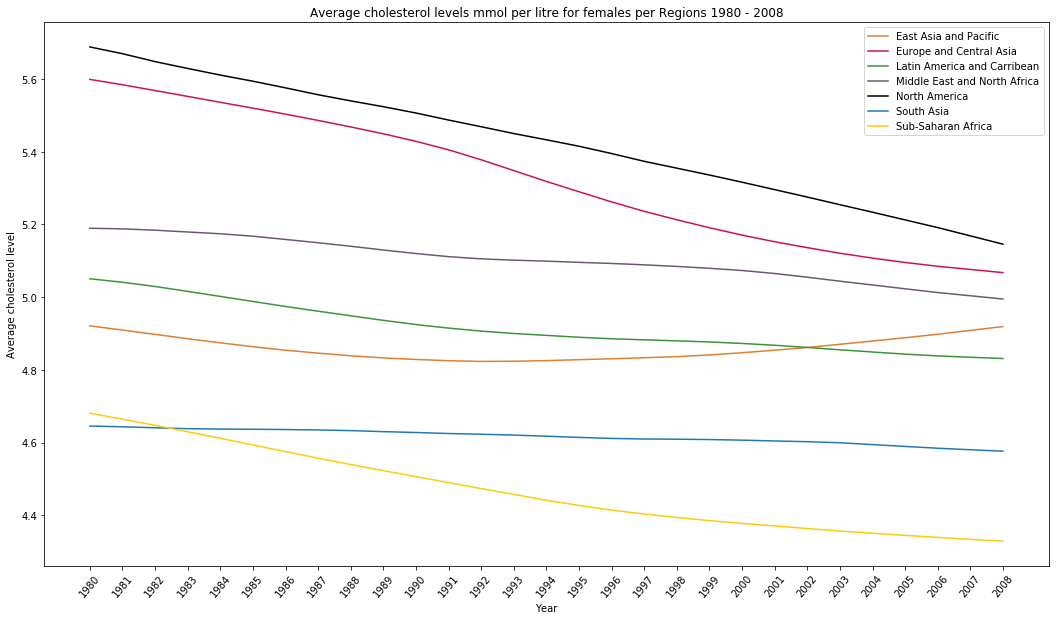

In [92]:
chol_male = parse_information(data.chol_male_path, data.chol_male_range, data.chol_male_country_column, regions)
chol_male_regional = create_region_map_for_data(chol_male, data.chol_male_country_column, regions)

chol_male_eap_mean = chol_male_regional[regions.eap_short].mean()
chol_male_eca_mean = chol_male_regional[regions.eca_short].mean()
chol_male_lac_mean = chol_male_regional[regions.lac_short].mean()
chol_male_mena_mean = chol_male_regional[regions.mena_short].mean()
chol_male_noa_mean = chol_male_regional[regions.noa_short].mean()
chol_male_sa_mean = chol_male_regional[regions.sa_short].mean()
chol_male_ssa_mean = chol_male_regional[regions.ssa_short].mean()

figure = plt.figure(figsize=(18,10))
plt.title("Average cholesterol levels mmol per litre for males per Regions 1980 - 2008")
plt.plot(chol_male_eap_mean, color=regions.eap_color, label = regions.eap_long)
plt.plot(chol_male_eca_mean, color=regions.eca_color, label = regions.eca_long)
plt.plot(chol_male_lac_mean, color=regions.lac_color, label = regions.lac_long)
plt.plot(chol_male_mena_mean, color=regions.mena_color, label = regions.mena_long)
plt.plot(chol_male_noa_mean, color=regions.noa_color, label = regions.noa_long)
plt.plot(chol_male_sa_mean, color=regions.sa_color, label = regions.sa_long)
plt.plot(chol_male_ssa_mean, color=regions.ssa_color, label = regions.ssa_long)
plt.legend()
plt.xlabel("Year")
plt.xticks(rotation=50)
plt.ylabel("Average cholesterol level")
plt.show()

chol_female = parse_information(data.chol_female_path, data.chol_female_range, data.chol_female_country_column, regions)
chol_female_regional = create_region_map_for_data(chol_female, data.chol_female_country_column, regions)

chol_female_eap_mean = chol_female_regional[regions.eap_short].mean()
chol_female_eca_mean = chol_female_regional[regions.eca_short].mean()
chol_female_lac_mean = chol_female_regional[regions.lac_short].mean()
chol_female_mena_mean = chol_female_regional[regions.mena_short].mean()
chol_female_noa_mean = chol_female_regional[regions.noa_short].mean()
chol_female_sa_mean = chol_female_regional[regions.sa_short].mean()
chol_female_ssa_mean = chol_female_regional[regions.ssa_short].mean()

figure = plt.figure(figsize=(18,10))
plt.title("Average cholesterol levels mmol per litre for females per Regions 1980 - 2008")
plt.plot(chol_female_eap_mean, color=regions.eap_color, label = regions.eap_long)
plt.plot(chol_female_eca_mean, color=regions.eca_color, label = regions.eca_long)
plt.plot(chol_female_lac_mean, color=regions.lac_color, label = regions.lac_long)
plt.plot(chol_female_mena_mean, color=regions.mena_color, label = regions.mena_long)
plt.plot(chol_female_noa_mean, color=regions.noa_color, label = regions.noa_long)
plt.plot(chol_female_sa_mean, color=regions.sa_color, label = regions.sa_long)
plt.plot(chol_female_ssa_mean, color=regions.ssa_color, label = regions.ssa_long)
plt.legend()
plt.xlabel("Year")
plt.xticks(rotation=50)
plt.ylabel("Average cholesterol level")
plt.show()

Cholesterol levels follows Average killocalories and Body mass index results. People in Middle East and North African region show a little smaller results than expected, due to the fact that they consume less alcohol, which also increase cholesterols.

<h1>How do our choices in food and drinks affect our overall health? <br /> Final conclusion</h1>
<br />
People from higher GDP regions live longer than those from poorer regions. That does not mean they are living healtier lives. People from this regions drink more, and are with higher body mass index and higher cholesterol levels, but better medical services compensate for that. 